# import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import altair as alt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
!gdown 1BlF8VU9dPAzhl_4QXeDzmRinsmRbfdNv
!gdown 1utatxybdRFBfTkm2YuuJnJEyTYXZXWX8

Downloading...
From (original): https://drive.google.com/uc?id=1BlF8VU9dPAzhl_4QXeDzmRinsmRbfdNv
From (redirected): https://drive.google.com/uc?id=1BlF8VU9dPAzhl_4QXeDzmRinsmRbfdNv&confirm=t&uuid=537acfbb-594d-4998-ac6b-3d1f7f2e378b
To: /content/application_train.csv
100% 166M/166M [00:01<00:00, 106MB/s]
Downloading...
From: https://drive.google.com/uc?id=1utatxybdRFBfTkm2YuuJnJEyTYXZXWX8
To: /content/application_test.csv
100% 26.6M/26.6M [00:00<00:00, 77.2MB/s]


#Read dataset

In [3]:
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Exploratory Data analisis

In [5]:
df = df_train.copy()

In [6]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

## Data quality check

In [8]:
list_items = []
for col in df.columns:
  list_items.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_items, columns= 'Feature, Data Type, Null, Null %, Unique, Unique Sample'.split(','))
desc_df

Feature  Data Type    Null     Null %   Unique  \
0                      SK_ID_CURR      int64       0   0.000000   307511   
1                          TARGET      int64       0   0.000000        2   
2              NAME_CONTRACT_TYPE     object       0   0.000000        2   
3                     CODE_GENDER     object       0   0.000000        3   
4                    FLAG_OWN_CAR     object       0   0.000000        2   
5                 FLAG_OWN_REALTY     object       0   0.000000        2   
6                    CNT_CHILDREN      int64       0   0.000000       15   
7                AMT_INCOME_TOTAL    float64       0   0.000000     2548   
8                      AMT_CREDIT    float64       0   0.000000     5603   
9                     AMT_ANNUITY    float64      12   0.003902    13672   
10                AMT_GOODS_PRICE    float64     278   0.090403     1002   
11                NAME_TYPE_SUITE     object    1292   0.420148        7   
12               NAME_INCOME_TYPE     object       0   0.000000        8   
13            NAME_EDUCATION_TYPE     object       0   0.000000        5   
14             NAME_FAMILY_STATUS     object       0   0.000000        6   
15              NAME_HOUSING_TYPE     object       0   0.000000        6   
16     REGION_POPULATION_RELATIVE    float64       0   0.000000       81   
17                     DAYS_BIRTH      int64       0   0.000000    17460   
18                  DAYS_EMPLOYED      int64       0   0.000000    12574   
19              DAYS_REGISTRATION    float64       0   0.000000    15688   
20                DAYS_ID_PUBLISH      int64       0   0.000000     6168   
21                    OWN_CAR_AGE    float64  202929  65.990810       62   
22                     FLAG_MOBIL      int64       0   0.000000        2   
23                 FLAG_EMP_PHONE      int64       0   0.000000        2   
24                FLAG_WORK_PHONE      int64       0   0.000000        2   
25               FLAG_CONT_MOBILE      int64       0   0.000000        2   
26                     FLAG_PHONE      int64       0   0.000000        2   
27                     FLAG_EMAIL      int64       0   0.000000        2   
28                OCCUPATION_TYPE     object   96391  31.345545       18   
29                CNT_FAM_MEMBERS    float64       2   0.000650       17   
30           REGION_RATING_CLIENT      int64       0   0.000000        3   
31    REGION_RATING_CLIENT_W_CITY      int64       0   0.000000        3   
32     WEEKDAY_APPR_PROCESS_START     object       0   0.000000        7   
33        HOUR_APPR_PROCESS_START      int64       0   0.000000       24   
34     REG_REGION_NOT_LIVE_REGION      int64       0   0.000000        2   
35     REG_REGION_NOT_WORK_REGION      int64       0   0.000000        2   
36    LIVE_REGION_NOT_WORK_REGION      int64       0   0.000000        2   
37         REG_CITY_NOT_LIVE_CITY      int64       0   0.000000        2   
38         REG_CITY_NOT_WORK_CITY      int64       0   0.000000        2   
39        LIVE_CITY_NOT_WORK_CITY      int64       0   0.000000        2   
40              ORGANIZATION_TYPE     object       0   0.000000       58   
41                   EXT_SOURCE_1    float64  173378  56.381073   114584   
42                   EXT_SOURCE_2    float64     660   0.214626   119831   
43                   EXT_SOURCE_3    float64   60965  19.825307      814   
44                 APARTMENTS_AVG    float64  156061  50.749729     2339   
45               BASEMENTAREA_AVG    float64  179943  58.515956     3780   
46    YEARS_BEGINEXPLUATATION_AVG    float64  150007  48.781019      285   
47                YEARS_BUILD_AVG    float64  204488  66.497784      149   
48                 COMMONAREA_AVG    float64  214865  69.872297     3181   
49                  ELEVATORS_AVG    float64  163891  53.295980      257   
50                  ENTRANCES_AVG    float64  154828  50.348768      285   
51                  FLOORSMAX_AVG    float64  153020  49.760822      403  

In [9]:
null_thresh = 0.45
list_null_above_thresh = []

for col in df.columns:
  if df[col].isna().sum() / len(df[col]) > null_thresh:
    list_null_above_thresh.append(col)

print("Columns with nulls above", null_thresh * 100, "%:", list_null_above_thresh)


Columns with nulls above 45.0 %: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMAT

In [10]:
# cek data duplicate
print('Jumlah data duplicate: ', df.duplicated().sum())

Jumlah data duplicate:  0


## Descriptive statistic

In [11]:
df.describe().T

count           mean            std  \
SK_ID_CURR                    307511.0  278180.518577  102790.175348   
TARGET                        307511.0       0.080729       0.272419   
CNT_CHILDREN                  307511.0       0.417052       0.722121   
AMT_INCOME_TOTAL              307511.0  168797.919297  237123.146279   
AMT_CREDIT                    307511.0  599025.999706  402490.776996   
AMT_ANNUITY                   307499.0   27108.573909   14493.737315   
AMT_GOODS_PRICE               307233.0  538396.207429  369446.460540   
REGION_POPULATION_RELATIVE    307511.0       0.020868       0.013831   
DAYS_BIRTH                    307511.0  -16036.995067    4363.988632   
DAYS_EMPLOYED                 307511.0   63815.045904  141275.766519   
DAYS_REGISTRATION             307511.0   -4986.120328    3522.886321   
DAYS_ID_PUBLISH               307511.0   -2994.202373    1509.450419   
OWN_CAR_AGE                   104582.0      12.061091      11.944812   
FLAG_MOBIL                    307511.0       0.999997       0.001803   
FLAG_EMP_PHONE                307511.0       0.819889       0.384280   
FLAG_WORK_PHONE               307511.0       0.199368       0.399526   
FLAG_CONT_MOBILE              307511.0       0.998133       0.043164   
FLAG_PHONE                    307511.0       0.281066       0.449521   
FLAG_EMAIL                    307511.0       0.056720       0.231307   
CNT_FAM_MEMBERS               307509.0       2.152665       0.910682   
REGION_RATING_CLIENT          307511.0       2.052463       0.509034   
REGION_RATING_CLIENT_W_CITY   307511.0       2.031521       0.502737   
HOUR_APPR_PROCESS_START       307511.0      12.063419       3.265832   
REG_REGION_NOT_LIVE_REGION    307511.0       0.015144       0.122126   
REG_REGION_NOT_WORK_REGION    307511.0       0.050769       0.219526   
LIVE_REGION_NOT_WORK_REGION   307511.0       0.040659       0.197499   
REG_CITY_NOT_LIVE_CITY        307511.0       0.078173       0.268444   
REG_CITY_NOT_WORK_CITY        307511.0       0.230454       0.421124   
LIVE_CITY_NOT_WORK_CITY       307511.0       0.179555       0.383817   
EXT_SOURCE_1                  134133.0       0.502130       0.211062   
EXT_SOURCE_2                  306851.0       0.514393       0.191060   
EXT_SOURCE_3                  246546.0       0.510853       0.194844   
APARTMENTS_AVG                151450.0       0.117440       0.108240   
BASEMENTAREA_AVG              127568.0       0.088442       0.082438   
YEARS_BEGINEXPLUATATION_AVG   157504.0       0.977735       0.059223   
YEARS_BUILD_AVG               103023.0       0.752471       0.113280   
COMMONAREA_AVG                 92646.0       0.044621       0.076036   
ELEVATORS_AVG                 143620.0       0.078942       0.134576   
ENTRANCES_AVG                 152683.0       0.149725       0.100049   
FLOORSMAX_AVG                 154491.0       0.226282       0.144641   
FLOORSMIN_AVG                  98869.0       0.231894       0.161380   
LANDAREA_AVG                  124921.0       0.066333       0.081184   
LIVINGAPARTMENTS_AVG           97312.0       0.100775       0.092576   
LIVINGAREA_AVG                153161.0       0.107399       0.110565   
NONLIVINGAPARTMENTS_AVG        93997.0       0.008809       0.047732   
NONLIVINGAREA_AVG             137829.0       0.028358       0.069523   
APARTMENTS_MODE               151450.0       0.114231       0.107936   
BASEMENTAREA_MODE             127568.0       0.087543       0.084307   
YEARS_BEGINEXPLUATATION_MODE  157504.0       0.977065       0.064575   
YEARS_BUILD_MODE              103023.0       0.759637       0.110111   
COMMONAREA_MODE                92646.0       0.042553       0.074445   
ELEVATORS_MODE                143620.0       0.074490       0.132256   
ENTRANCES_MODE                152683.0       0.145193       0.100977   
FLOORSMAX_MODE                154491.0       0.222315       0.143709   
FLOORSMIN_MODE                 98869.0       0.228058       0.161160   
L

In [12]:
df.describe(exclude= np.number).T

count unique                            top  \
NAME_CONTRACT_TYPE          307511      2                     Cash loans   
CODE_GENDER                 307511      3                              F   
FLAG_OWN_CAR                307511      2                              N   
FLAG_OWN_REALTY             307511      2                              Y   
NAME_TYPE_SUITE             306219      7                  Unaccompanied   
NAME_INCOME_TYPE            307511      8                        Working   
NAME_EDUCATION_TYPE         307511      5  Secondary / secondary special   
NAME_FAMILY_STATUS          307511      6                        Married   
NAME_HOUSING_TYPE           307511      6              House / apartment   
OCCUPATION_TYPE             211120     18                       Laborers   
WEEKDAY_APPR_PROCESS_START  307511      7                        TUESDAY   
ORGANIZATION_TYPE           307511     58         Business Entity Type 3   
FONDKAPREMONT_MODE           97216      4               reg oper account   
HOUSETYPE_MODE              153214      3                 block of flats   
WALLSMATERIAL_MODE          151170      7                          Panel   
EMERGENCYSTATE_MODE         161756      2                             No   

                              freq  
NAME_CONTRACT_TYPE          278232  
CODE_GENDER                 202448  
FLAG_OWN_CAR                202924  
FLAG_OWN_REALTY             213312  
NAME_TYPE_SUITE             248526  
NAME_INCOME_TYPE            158774  
NAME_EDUCATION_TYPE         218391  
NAME_FAMILY_STATUS          196432  
NAME_HOUSING_TYPE           272868  
OCCUPATION_TYPE              55186  
WEEKDAY_APPR_PROCESS_START   53901  
ORGANIZATION_TYPE            67992  
FONDKAPREMONT_MODE           73830  
HOUSETYPE_MODE              150503  
WALLSMATERIAL_MODE           66040  
EMERGENCYSTATE_MODE         159428

In [13]:
nums = df.select_dtypes(include=[np.number]).columns
cats = df.select_dtypes(exclude=[np.number]).columns

### Univariate analisis

In [14]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [15]:
unique_counts = df.nunique()

unique_counts_df = pd.DataFrame(unique_counts, columns=['Unique_Count'])

unique_counts_df

Unique_Count
SK_ID_CURR                          307511
TARGET                                   2
NAME_CONTRACT_TYPE                       2
CODE_GENDER                              3
FLAG_OWN_CAR                             2
FLAG_OWN_REALTY                          2
CNT_CHILDREN                            15
AMT_INCOME_TOTAL                      2548
AMT_CREDIT                            5603
AMT_ANNUITY                          13672
AMT_GOODS_PRICE                       1002
NAME_TYPE_SUITE                          7
NAME_INCOME_TYPE                         8
NAME_EDUCATION_TYPE                      5
NAME_FAMILY_STATUS                       6
NAME_HOUSING_TYPE                        6
REGION_POPULATION_RELATIVE              81
DAYS_BIRTH                           17460
DAYS_EMPLOYED                        12574
DAYS_REGISTRATION                    15688
DAYS_ID_PUBLISH                       6168
OWN_CAR_AGE                             62
FLAG_MOBIL                               2
FLAG_EMP_PHONE                           2
FLAG_WORK_PHONE                          2
FLAG_CONT_MOBILE                         2
FLAG_PHONE                               2
FLAG_EMAIL                               2
OCCUPATION_TYPE                         18
CNT_FAM_MEMBERS                         17
REGION_RATING_CLIENT                     3
REGION_RATING_CLIENT_W_CITY              3
WEEKDAY_APPR_PROCESS_START               7
HOUR_APPR_PROCESS_START                 24
REG_REGION_NOT_LIVE_REGION               2
REG_REGION_NOT_WORK_REGION               2
LIVE_REGION_NOT_WORK_REGION              2
REG_CITY_NOT_LIVE_CITY                   2
REG_CITY_NOT_WORK_CITY                   2
LIVE_CITY_NOT_WORK_CITY                  2
ORGANIZATION_TYPE                       58
EXT_SOURCE_1                        114584
EXT_SOURCE_2                        119831
EXT_SOURCE_3                           814
APARTMENTS_AVG                        2339
BASEMENTAREA_AVG                      3780
YEARS_BEGINEXPLUATATION_AVG            285
YEARS_BUILD_AVG                        149
COMMONAREA_AVG                        3181
ELEVATORS_AVG                          257
ENTRANCES_AVG                          285
FLOORSMAX_AVG                          403
FLOORSMIN_AVG                          305
LANDAREA_AVG                          3527
LIVINGAPARTMENTS_AVG                  1868
LIVINGAREA_AVG                        5199
NONLIVINGAPARTMENTS_AVG                386
NONLIVINGAREA_AVG                     3290
APARTMENTS_MODE                        760
BASEMENTAREA_MODE                     3841
YEARS_BEGINEXPLUATATION_MODE           221
YEARS_BUILD_MODE                       154
COMMONAREA_MODE                       3128
ELEVATORS_MODE                          26
ENTRANCES_MODE                          30
FLOORSMAX_MODE                          25
FLOORSMIN_MODE                          25
LANDAREA_MODE                         3563
LIVINGAPARTMENTS_MODE                  736
LIVINGAREA_MODE                       5301
NONLIVINGAPARTMENTS_MODE               167
NONLIVINGAREA_MODE                    3327
APARTMENTS_MEDI                       1148
BASEMENTAREA_MEDI                     3772
YEARS_BEGINEXPLUATATION_MEDI           245
YEARS_BUILD_MEDI                       151
COMMONAREA_MEDI                       3202
ELEVATORS_MEDI                          46
ENTRANCES_MEDI                          46
FLOORSMAX_MEDI                          49
FLOORSMIN_MEDI                          47
LANDAREA_MEDI                         3560
LIVINGAPARTMENTS_MEDI                 1097
LIVINGAREA_MEDI                       5281
NONLIVINGAPARTMENTS_MEDI               214
NONLIVINGAREA_MEDI                    3323
FONDKAPREMONT_MODE                       4
HOUSETYPE_MODE                           3
TOTALAREA_MODE                        5116
WALLSMATERIAL_MODE                       7
EMERGENCYSTATE_MODE                      2
OBS_30_CNT_SOCIAL_CIRCLE                33
DEF_30_CNT_SOCIAL_CIRCLE       

In [16]:
CATS = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE','FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION',	'REG_REGION_NOT_WORK_REGION',	'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY',	'LIVE_CITY_NOT_WORK_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
       'FLAG_DOCUMENT_2',	'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',	'FLAG_DOCUMENT_5',	'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7',	'FLAG_DOCUMENT_8',	'FLAG_DOCUMENT_9',	'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11',	'FLAG_DOCUMENT_12',	'FLAG_DOCUMENT_13',	'FLAG_DOCUMENT_14',	'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16',	'FLAG_DOCUMENT_17',	'FLAG_DOCUMENT_18',	'FLAG_DOCUMENT_19',	'FLAG_DOCUMENT_20',	'FLAG_DOCUMENT_21']

numerical_features = [col for col in df.columns if col not in CATS]

NUMS = df[numerical_features].columns

In [17]:
print(cats)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


In [18]:
unique_counts = df.nunique()

cats_2 = unique_counts[unique_counts < 5].index.tolist()

print("Columns with less than 5 unique values:", cats_2)

Columns with less than 5 unique values: ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


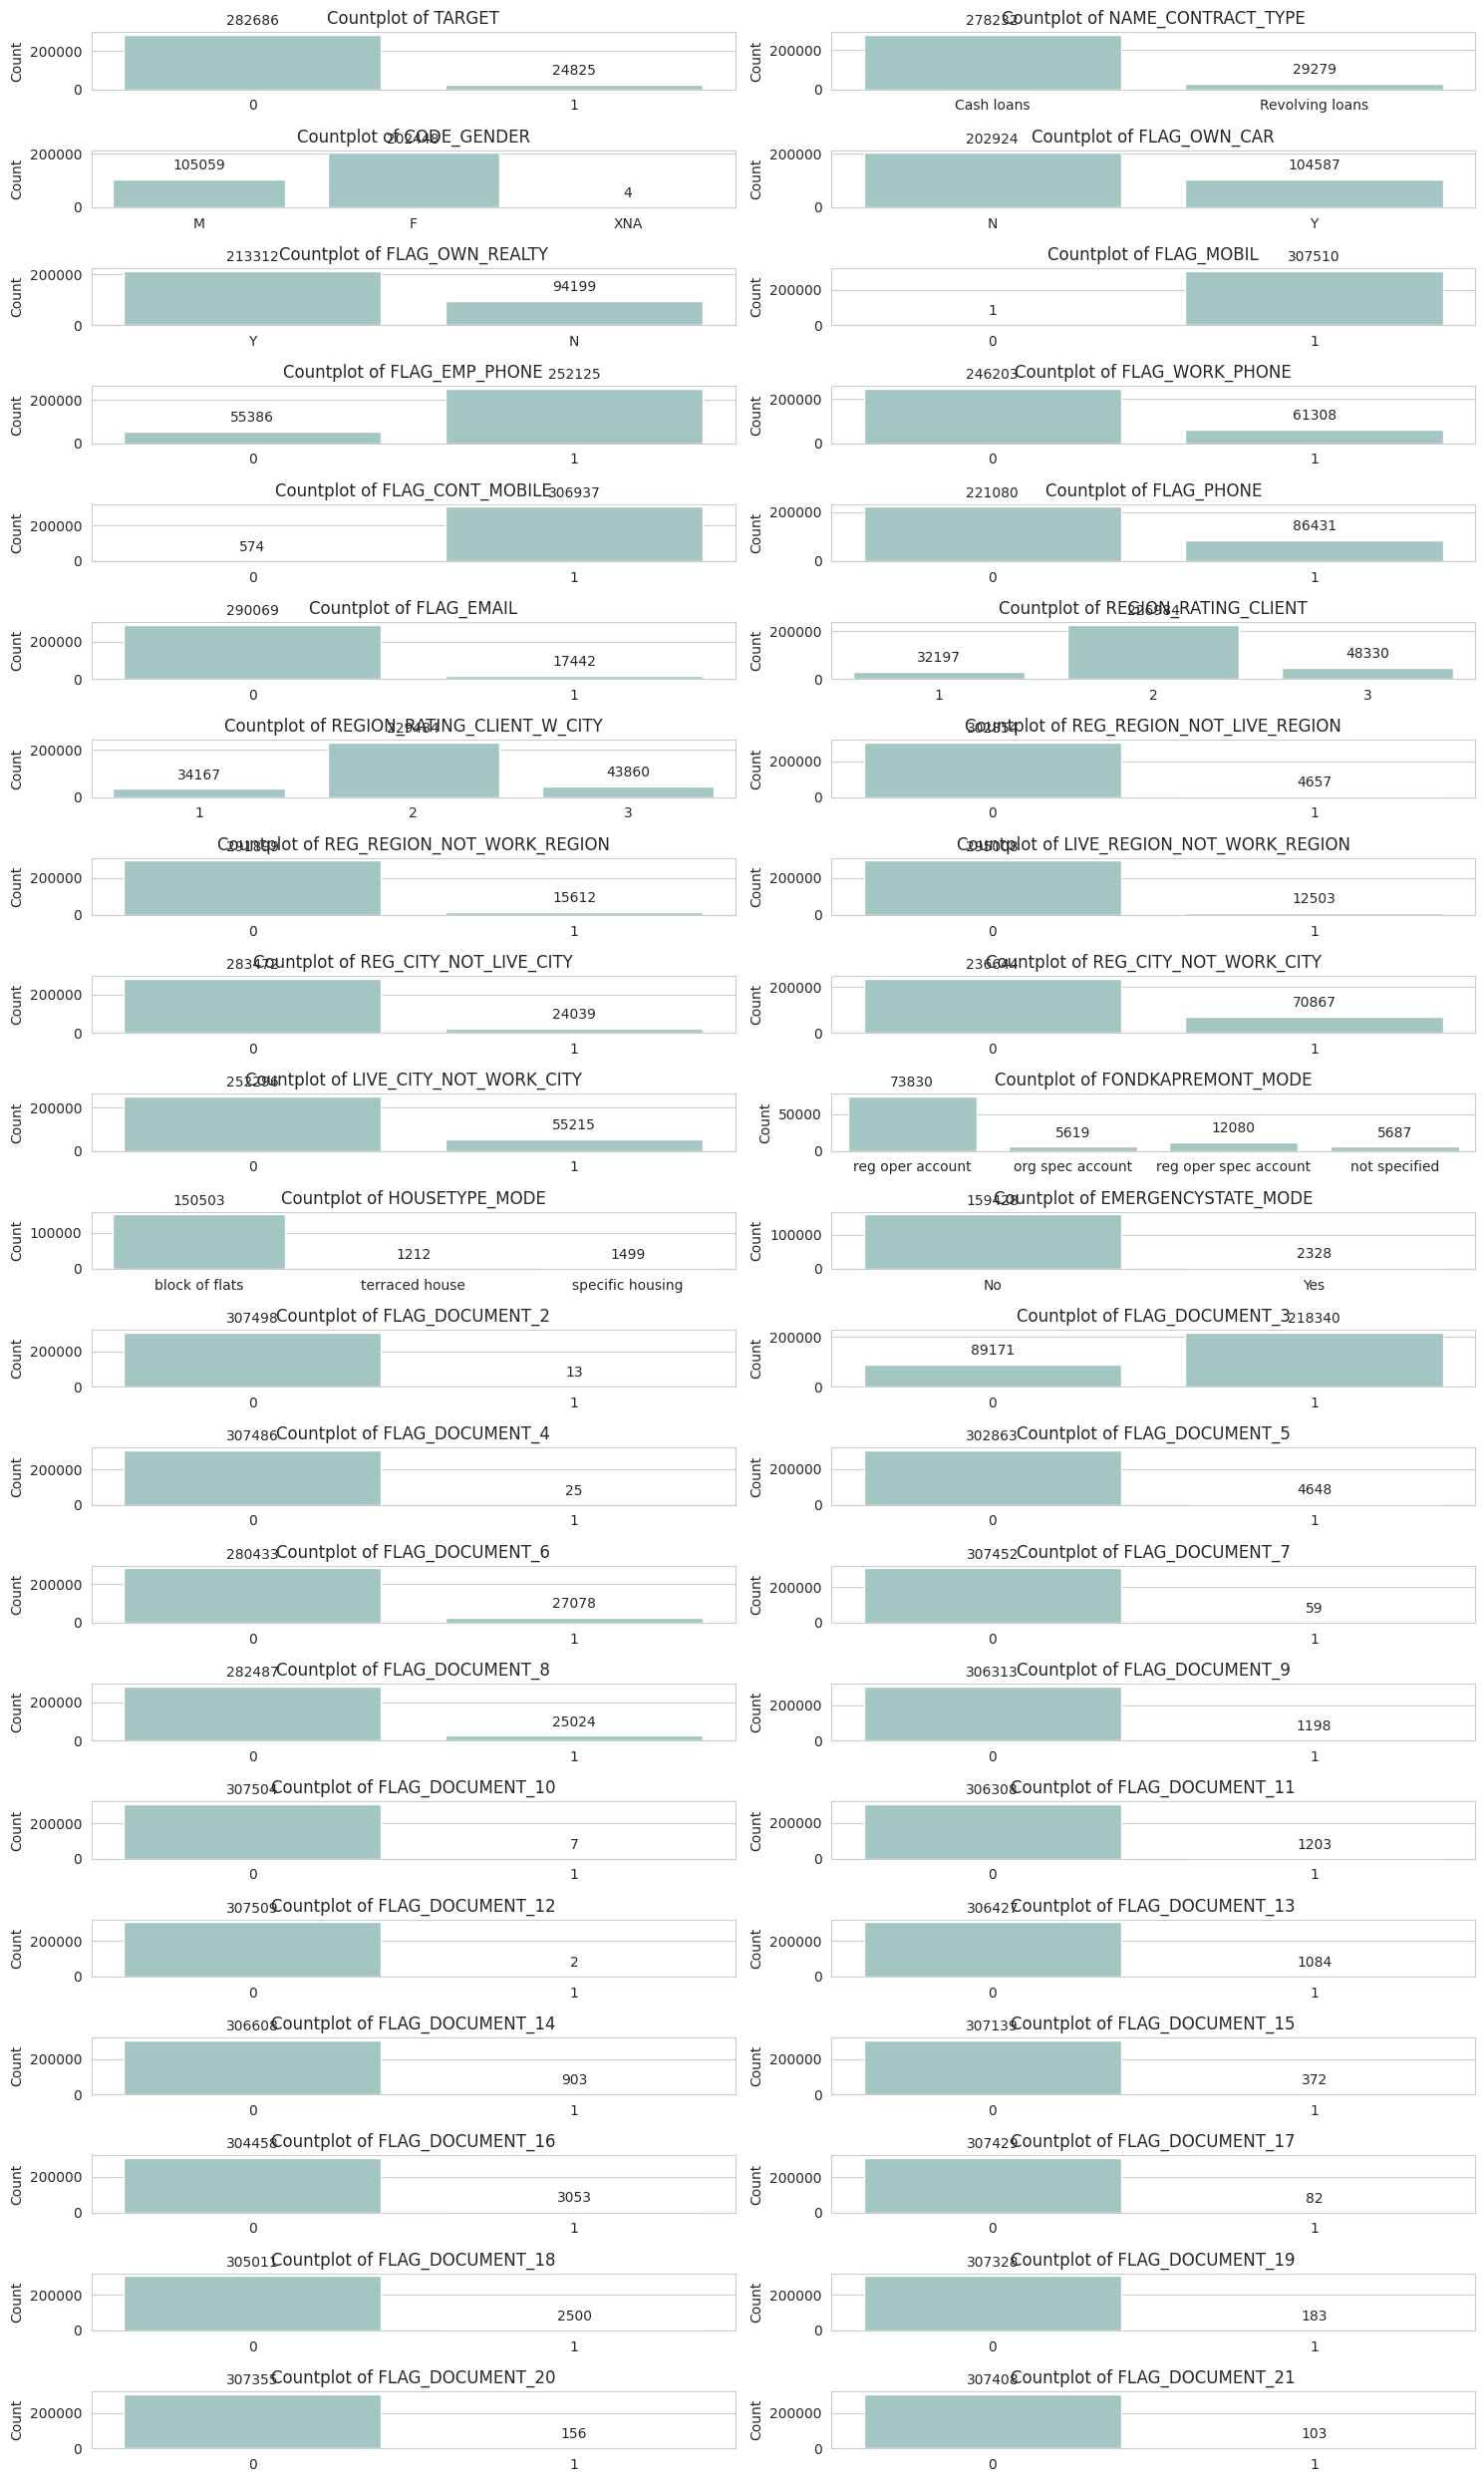

In [19]:
cats_1 = cats_2

color = '#9eccc8'

sns.set_style("whitegrid")

fig, axes = plt.subplots(len(cats_1)//2, 2, figsize=(15, 25))
# fig, axes = plt.subplots(6, 2, figsize=(25, 25))

axes = axes.flatten()

for i, cat in enumerate(cats_1):
    sns.countplot(x=cat, data=df, ax=axes[i], color=color)
    axes[i].set_title(f'Countplot of {cat}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    plt.subplots_adjust(top=0.85)

    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.0f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 10),
                         textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [20]:
decode_map = {0: "Good Payment History", 1: "Bad Payment History"}
def decode_sentiment(label):
    return decode_map[int(label)]

df['TARGET'] = df['TARGET'].apply(lambda x: decode_sentiment(x))


In [21]:
target_agg = (df[['TARGET']].groupby("TARGET").agg(COUNT=("TARGET","count")).sort_values(by=["COUNT"],ascending=False).reset_index())

target_agg.style.background_gradient(cmap='Blues')

In [22]:
# menghitung target

gpp = df['TARGET'].value_counts(normalize=True)
gpp.reset_index().style.background_gradient(cmap='Blues')

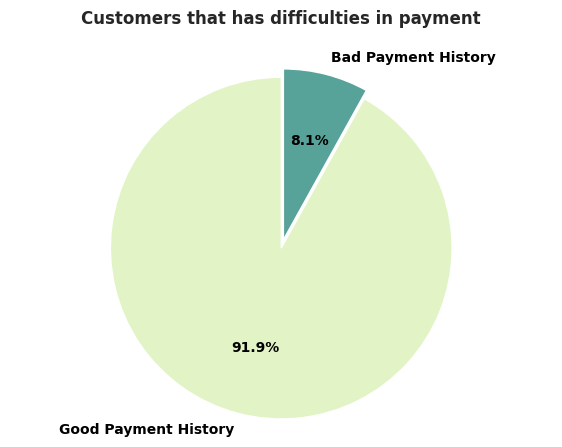

In [23]:
labels = ['Good Payment History', 'Bad Payment History']

churn_rate = df['TARGET'].value_counts()
explode = (0.05, 0)
text_props = {'color': 'black', 'weight': 'bold'}

plt.figure(figsize=(7, 5))
plt.pie(churn_rate, labels=labels, autopct='%1.1f%%', startangle=90, explode = explode, colors = ['#E2F4C5', '#58A399'], textprops=text_props)
plt.axis('equal')
plt.title('Customers that has difficulties in payment', fontweight='bold', pad=20)
plt.show()

In [24]:
color = ['#E2F4C5', '#58A399']

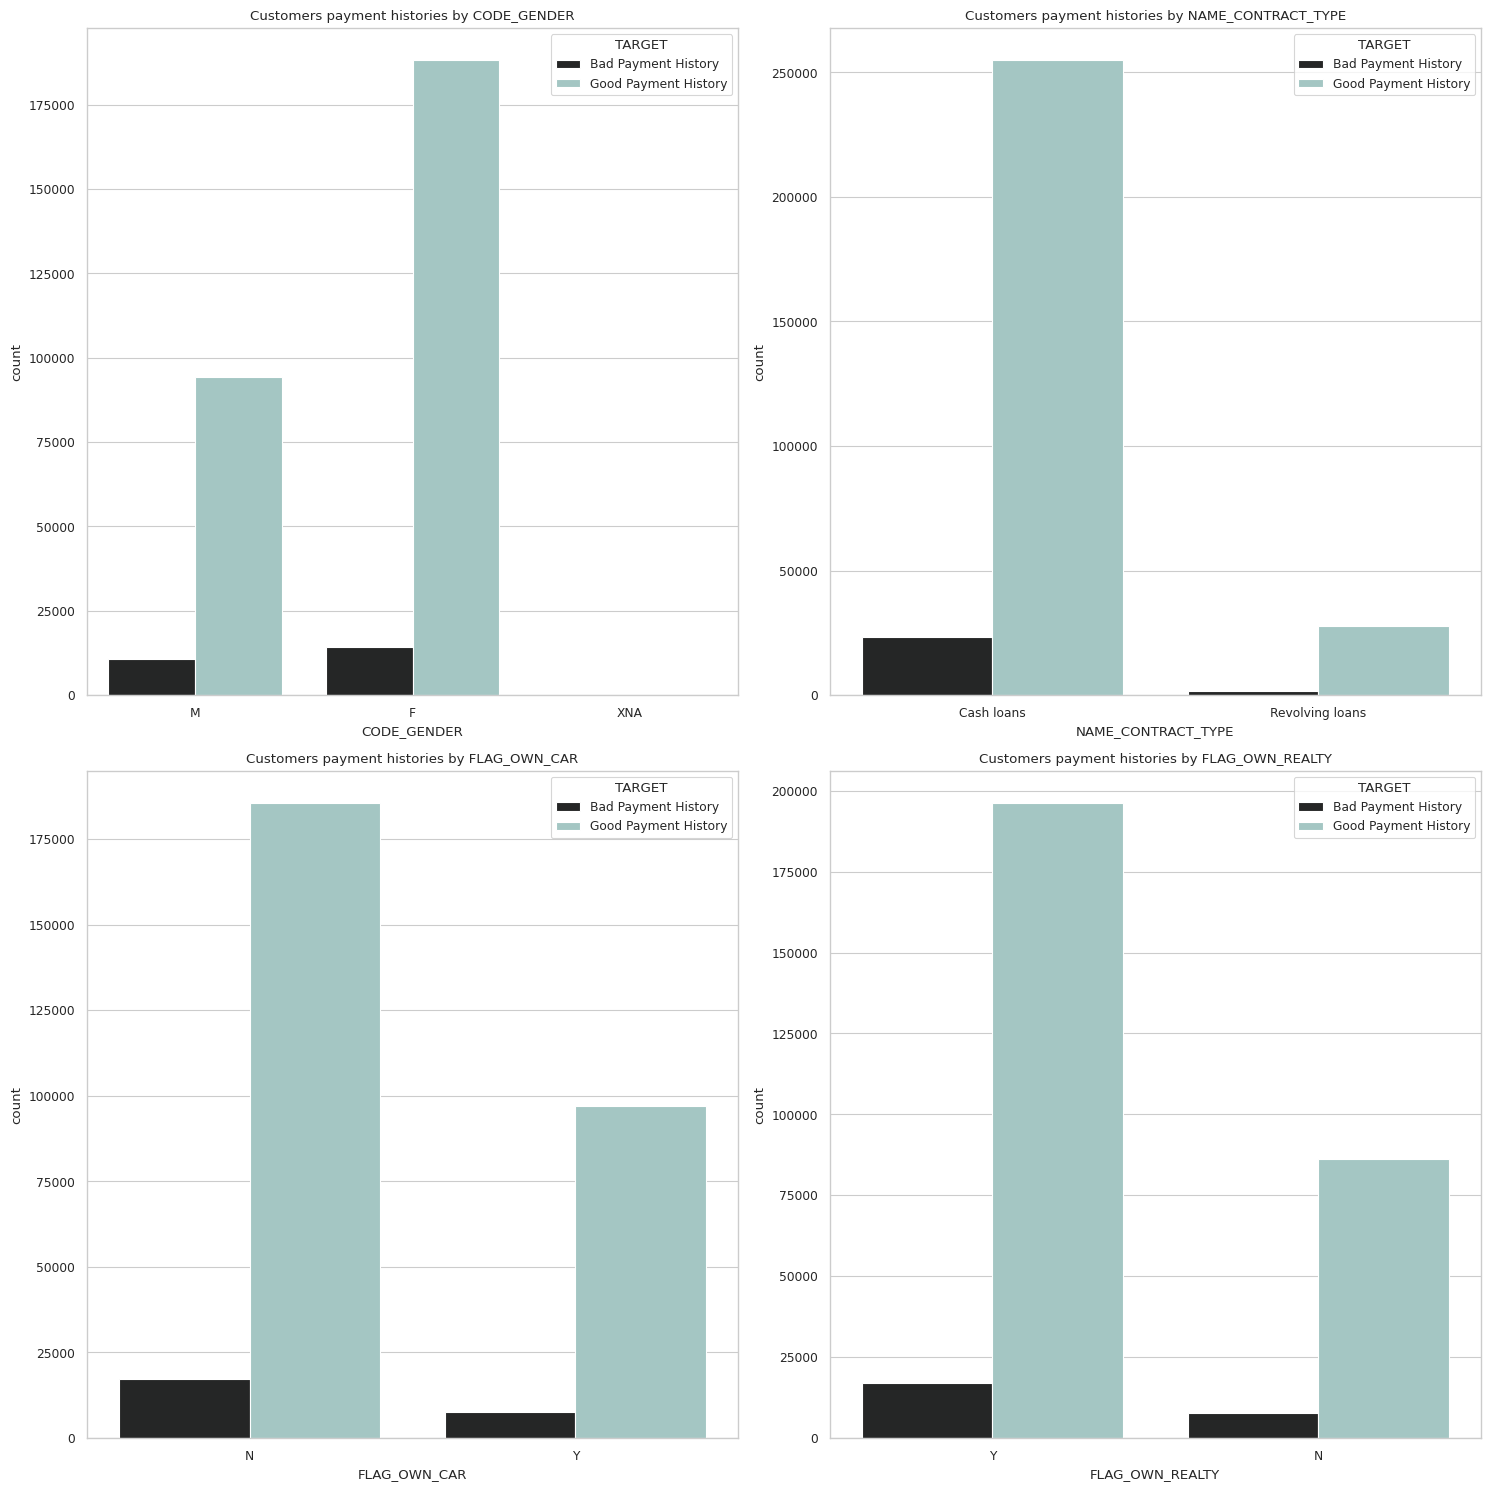

In [25]:
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1)

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

list_cats = ['CODE_GENDER', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

for i, cat in enumerate(list_cats):
    sns.countplot(x=cat, data=df, ax=axes[i//2, i%2], palette = 'dark:#9eccc8', hue = 'TARGET')  # Efficient indexing for subplots
    axes[i//2, i%2].set_title(f'Customers payment histories by {cat}')  # Set subplot title

plt.tight_layout()

plt.show()

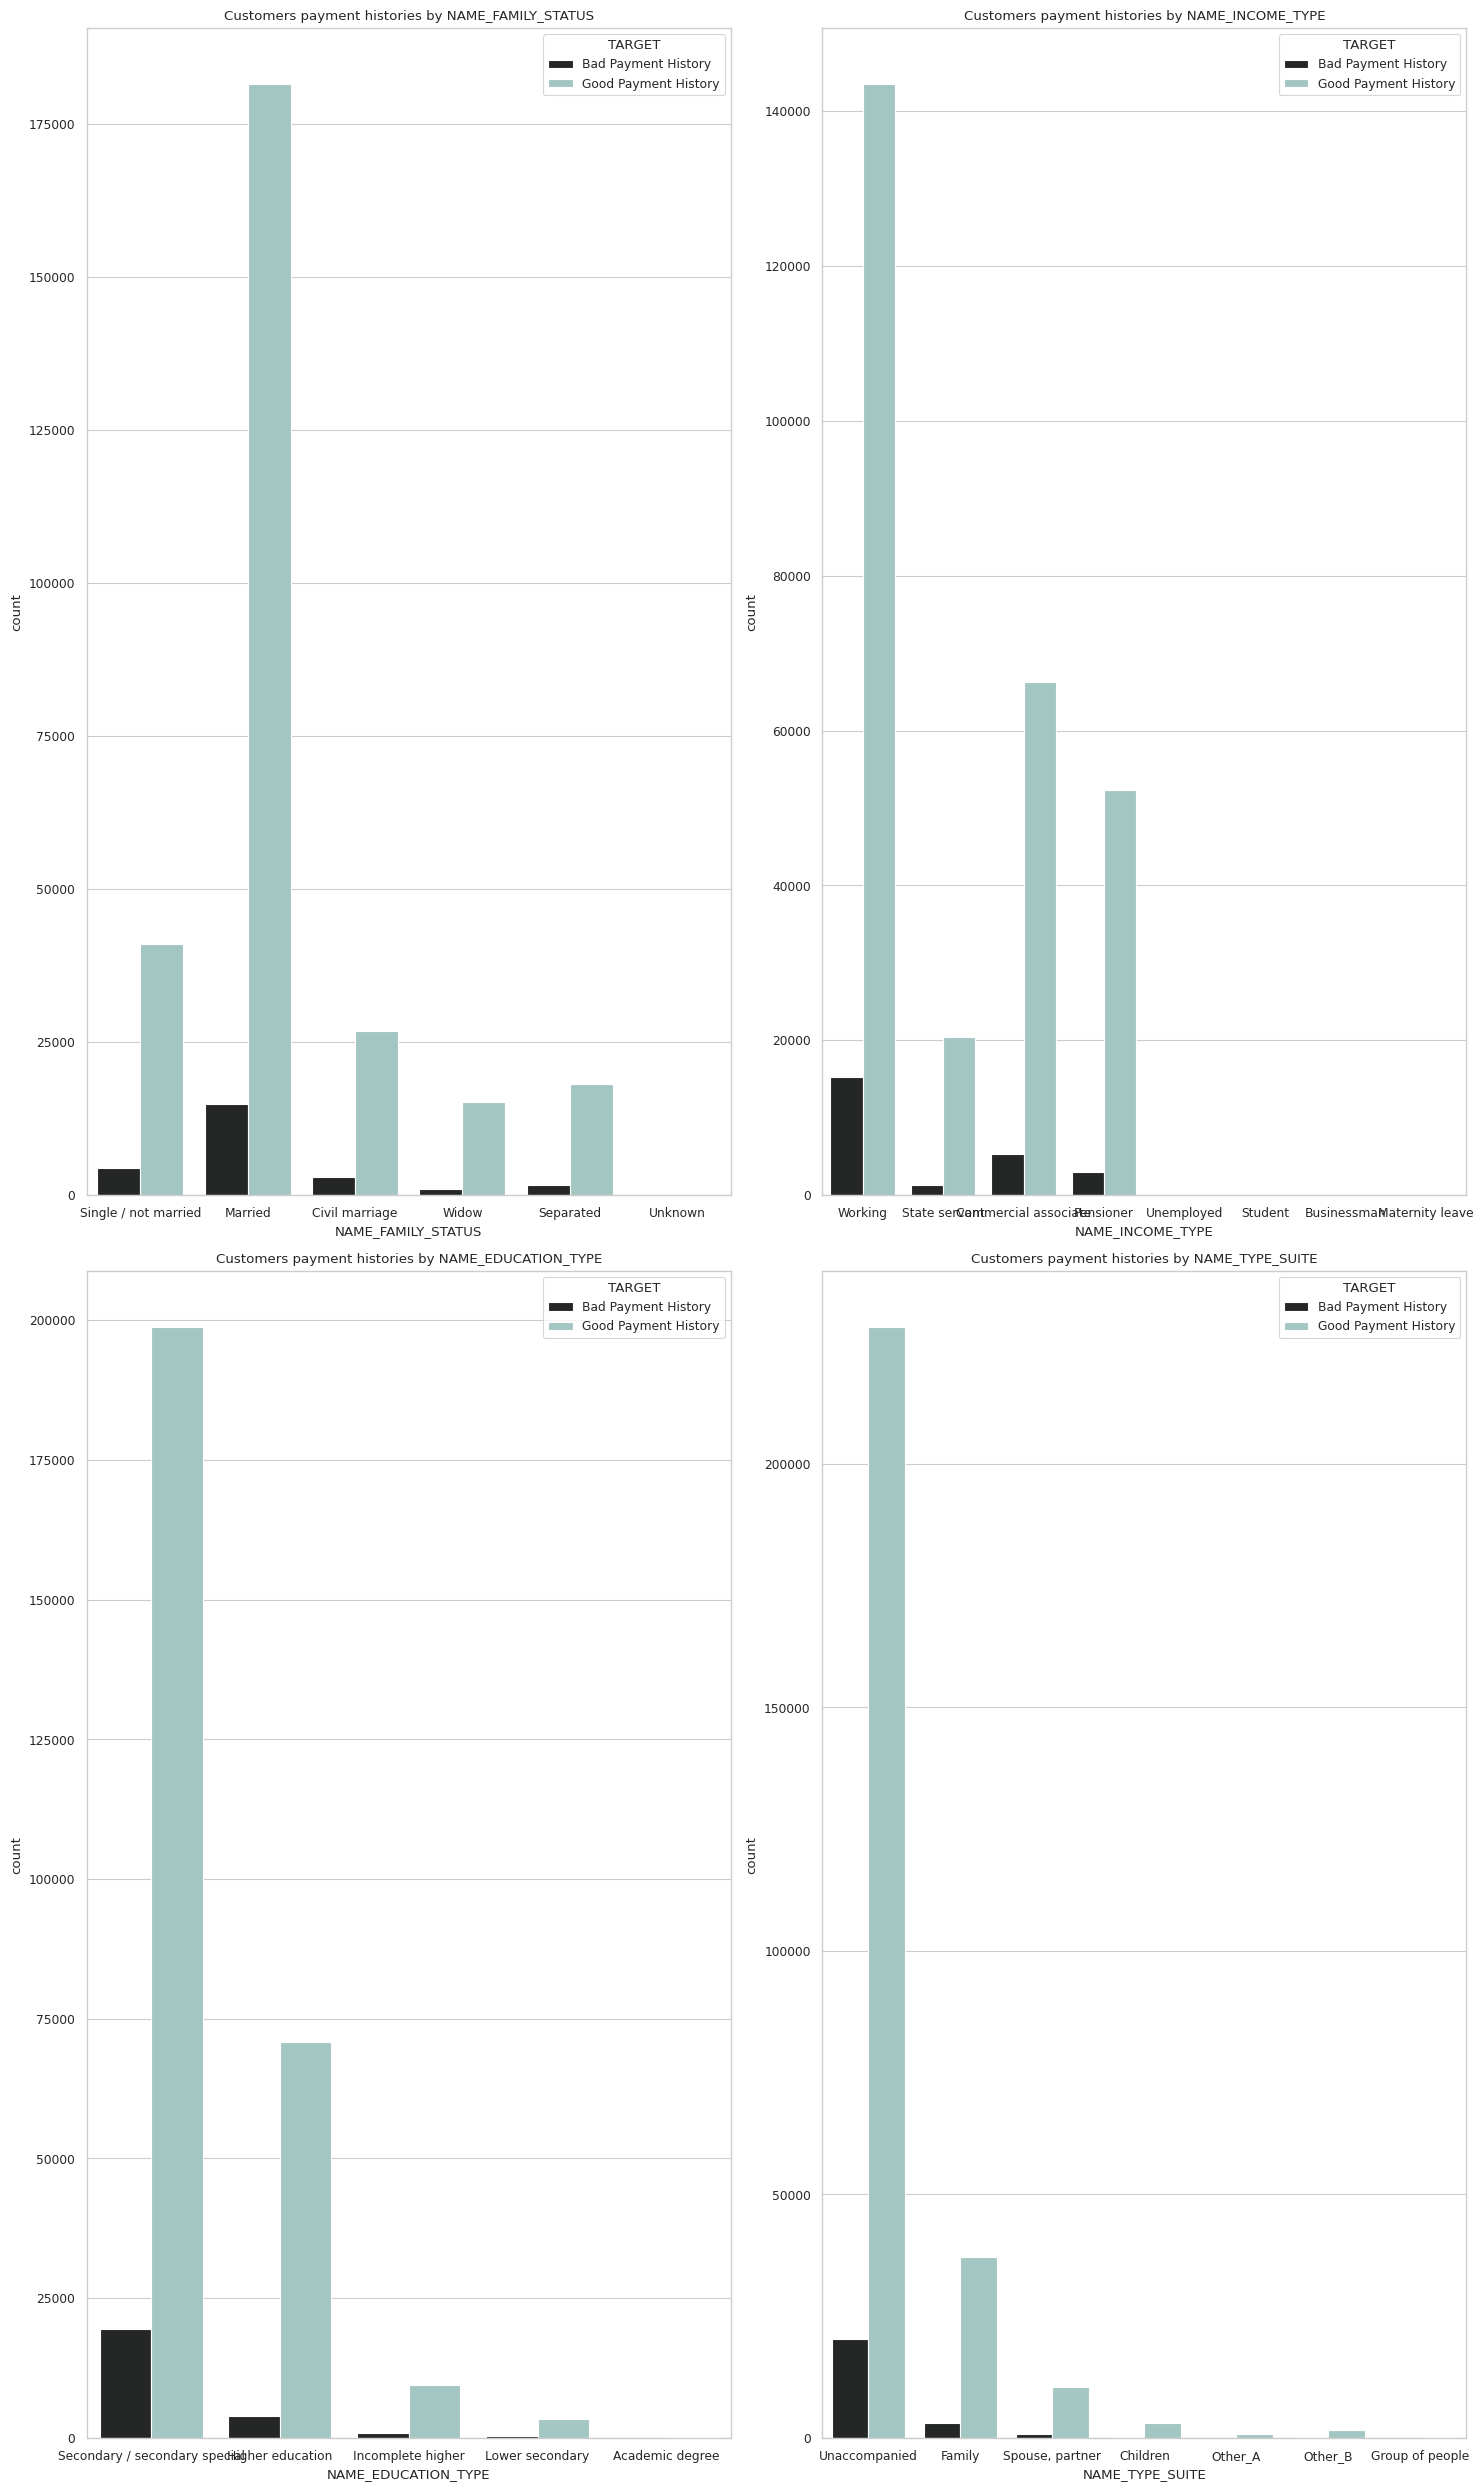

In [26]:
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1)

fig, axes = plt.subplots(2, 2, figsize=(15, 25))

list_cats = ['NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_TYPE_SUITE']
for i, cat in enumerate(list_cats):
    sns.countplot(x=cat, data=df, ax=axes[i//2, i%2], palette = 'dark:#9eccc8', hue = 'TARGET')  # Efficient indexing for subplots
    axes[i//2, i%2].set_title(f'Customers payment histories by {cat}')  # Set subplot title

plt.tight_layout()

plt.show()

Text(0.5, 0, '\nHousing Type')

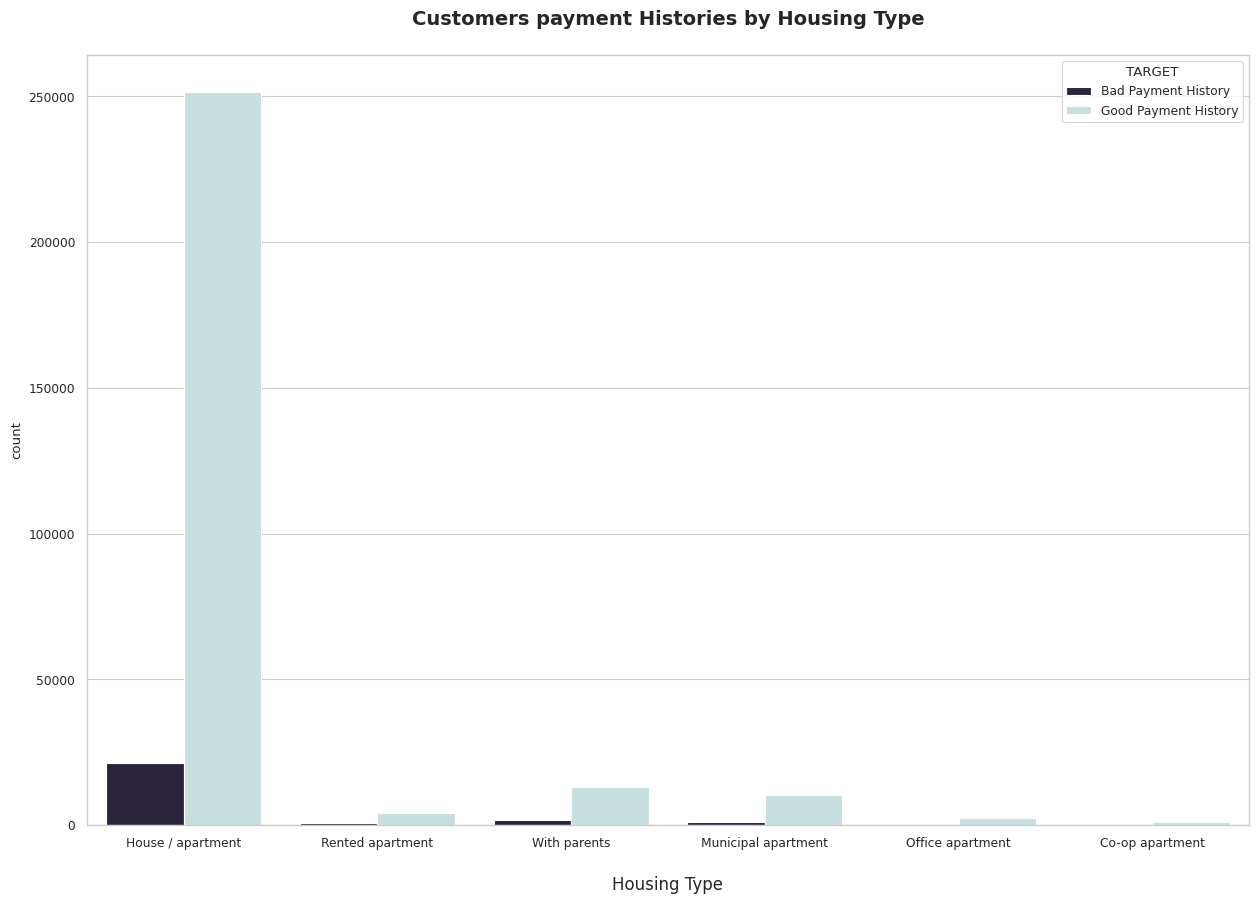

In [27]:
plt.figure(figsize=(15,10))

fig = sns.countplot(x='NAME_HOUSING_TYPE', data = df, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r')
plt.title('Customers payment Histories by Housing Type\n', fontweight='bold', fontsize=14)
plt.xlabel('\nHousing Type', fontsize=12)

Text(0.5, 0, '\nProcess Day')

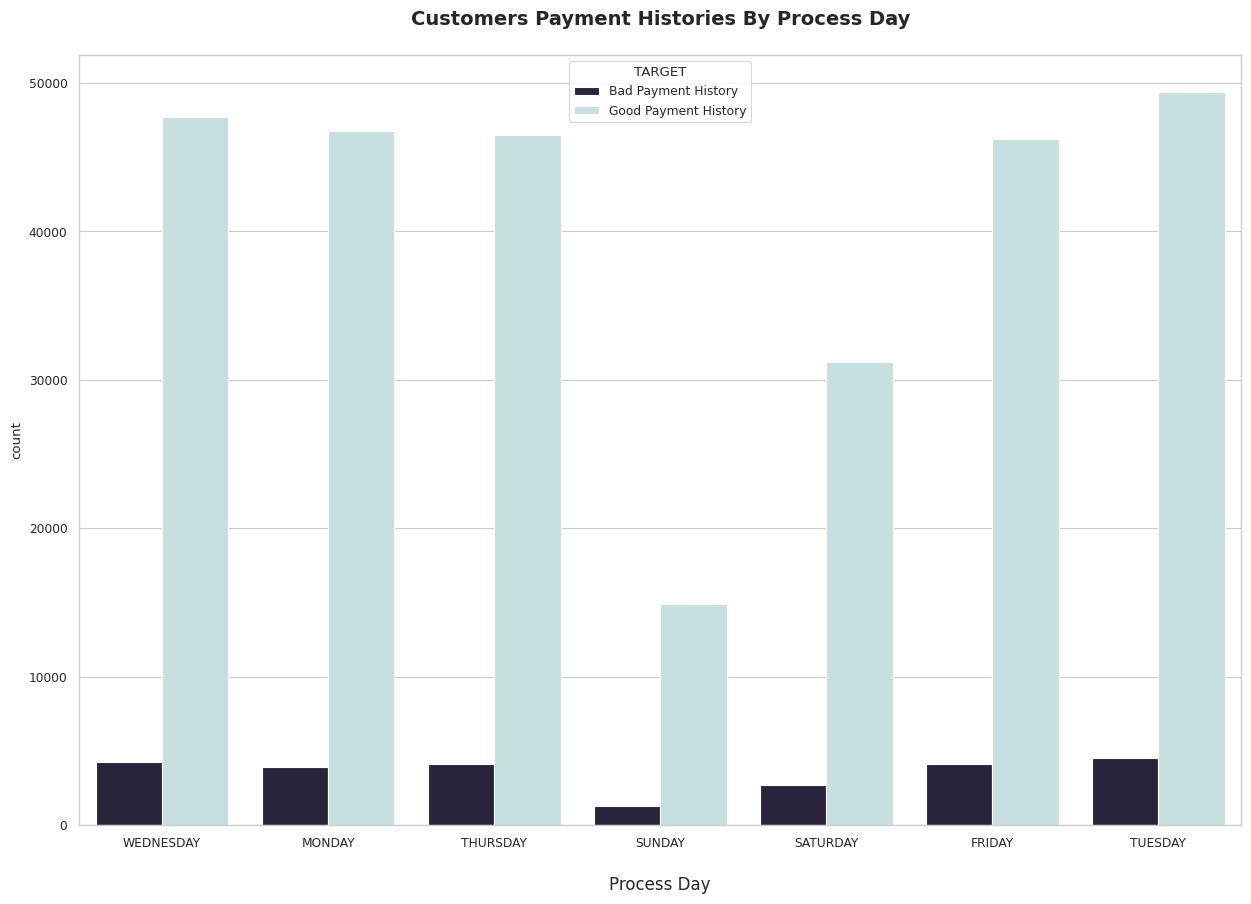

In [28]:

plt.figure(figsize=(15,10))

fig = sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data = df, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r')
plt.title('Customers Payment Histories By Process Day\n', fontweight='bold', fontsize=14)
plt.xlabel('\nProcess Day', fontsize=12)

### Bivariate analisis
numerik dan terget

In [29]:
df[NUMS].head(10)

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0      100002             0          202500.0    406597.5      24700.5   
1      100003             0          270000.0   1293502.5      35698.5   
2      100004             0           67500.0    135000.0       6750.0   
3      100006             0          135000.0    312682.5      29686.5   
4      100007             0          121500.0    513000.0      21865.5   
5      100008             0           99000.0    490495.5      27517.5   
6      100009             1          171000.0   1560726.0      41301.0   
7      100010             0          360000.0   1530000.0      42075.0   
8      100011             0          112500.0   1019610.0      33826.5   
9      100012             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461           -637   
1        1129500.0                    0.003541      -16765          -1188   
2         135000.0                    0.010032      -19046           -225   
3         297000.0                    0.008019      -19005          -3039   
4         513000.0                    0.028663      -19932          -3038   
5         454500.0                    0.035792      -16941          -1588   
6        1395000.0                    0.035792      -13778          -3130   
7        1530000.0                    0.003122      -18850           -449   
8         913500.0                    0.018634      -20099         365243   
9         405000.0                    0.019689      -14469          -2019   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120          NaN              1.0   
1            -1186.0             -291          NaN              2.0   
2            -4260.0            -2531         26.0              1.0   
3            -9833.0            -2437          NaN              2.0   
4            -4311.0            -3458          NaN              1.0   
5            -4970.0             -477          NaN              2.0   
6            -1213.0             -619         17.0              3.0   
7            -4597.0            -2379          8.0              2.0   
8            -7427.0            -3514          NaN              2.0   
9           -14437.0            -3992          NaN              1.0   

   HOUR_APPR_PROCESS_START  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                       10      0.083037      0.262949      0.139376   
1                       11      0.311267      0.622246           NaN   
2                        9           NaN      0.555912      0.729567   
3                       17           NaN      0.650442           NaN   
4                       11           NaN      0.322738           NaN   
5                       16           NaN      0.354225      0.621226   
6                       16      0.774761      0.724000      0.492060   
7                       16           NaN      0.714279      0.540654   
8                       14      0.587334      0.205747      0.751724   
9                        8           NaN      0.746644           NaN   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2             NaN               NaN                          NaN   
3             NaN               NaN                          NaN   
4             NaN               NaN                          NaN   
5             NaN               NaN                          NaN   
6             NaN               NaN                          NaN   
7             NaN               NaN                          NaN   
8             NaN               NaN                          NaN   
9             NaN               NaN                          NaN   

   YEARS_BUILD_A

## OUTLIER, KORELASI

In [30]:
df[NUMS].head()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0      100002             0          202500.0    406597.5      24700.5   
1      100003             0          270000.0   1293502.5      35698.5   
2      100004             0           67500.0    135000.0       6750.0   
3      100006             0          135000.0    312682.5      29686.5   
4      100007             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461           -637   
1        1129500.0                    0.003541      -16765          -1188   
2         135000.0                    0.010032      -19046           -225   
3         297000.0                    0.008019      -19005          -3039   
4         513000.0                    0.028663      -19932          -3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120          NaN              1.0   
1            -1186.0             -291          NaN              2.0   
2            -4260.0            -2531         26.0              1.0   
3            -9833.0            -2437          NaN              2.0   
4            -4311.0            -3458          NaN              1.0   

   HOUR_APPR_PROCESS_START  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                       10      0.083037      0.262949      0.139376   
1                       11      0.311267      0.622246           NaN   
2                        9           NaN      0.555912      0.729567   
3                       17           NaN      0.650442           NaN   
4                       11           NaN      0.322738           NaN   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2             NaN               NaN                          NaN   
3             NaN               NaN                          NaN   
4             NaN               NaN                          NaN   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2              NaN             NaN            NaN            NaN   
3              NaN             NaN            NaN            NaN   
4              NaN             NaN            NaN            NaN   

   FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  \
0         0.0833         0.1250        0.0369                0.0202   
1         0.2917         0.3333        0.0130                0.0773   
2            NaN            NaN           NaN                   NaN   
3            NaN            NaN           NaN                   NaN   
4            NaN            NaN           NaN                   NaN   

   LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
0          0.0190                   0.0000             0.0000   
1          0.0549                   0.0039             0.0098   
2             NaN                      NaN                NaN   
3             NaN                      NaN                NaN   
4             NaN                      NaN                NaN   

   APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  \
0           0.0252             0.0383                        0.9722   
1           0.0924             0.0538                        0.9851   
2              NaN                NaN                           NaN   
3              NaN                NaN                           NaN   
4              NaN                NaN                           NaN   

   YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  \
0            0.6341           0.0144          0.0000          0.0690   
1            0.8040         

In [31]:
print(f'Total rows: {len(df)}')
Kolom_numerik1 = NUMS

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []


filtered_entries = np.array([True] * len(df))
for col in Kolom_numerik1:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    #filter outlier
    filter_outlier = ((df[col] >= low_limit) & (df[col] <= high_limit))
    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(df[~filtered_entries]))
print("Not Outlier All Data :", len(df[filtered_entries]))
print()

pd.DataFrame({
    "Column Name":Kolom_numerik1,
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier":outlier,
    "No Outlier":no_outlier
})

Total rows: 307511
Outlier All Data : 305207
Not Outlier All Data : 2304



Column Name  is Outlier    Lower Limit   Upper Limit  \
0                     SK_ID_CURR       False  -77850.000000  6.341380e+05   
1                   CNT_CHILDREN        True      -1.500000  2.500000e+00   
2               AMT_INCOME_TOTAL        True  -22500.000000  3.375000e+05   
3                     AMT_CREDIT        True -537975.000000  1.616625e+06   
4                    AMT_ANNUITY        True  -10584.000000  6.170400e+04   
5                AMT_GOODS_PRICE        True -423000.000000  1.341000e+06   
6     REGION_POPULATION_RELATIVE        True      -0.017980  5.664850e-02   
7                     DAYS_BIRTH       False  -30585.500000 -1.509500e+03   
8                  DAYS_EMPLOYED        True   -6466.500000  3.417500e+03   
9              DAYS_REGISTRATION        True  -15683.750000  6.194250e+03   
10               DAYS_ID_PUBLISH       False   -8167.500000  2.148500e+03   
11                   OWN_CAR_AGE        True     -10.000000  3.000000e+01   
12               CNT_FAM_MEMBERS        True       0.500000  4.500000e+00   
13       HOUR_APPR_PROCESS_START        True       4.000000  2.000000e+01   
14                  EXT_SOURCE_1       False      -0.177561  1.186621e+00   
15                  EXT_SOURCE_2       False      -0.014282  1.070357e+00   
16                  EXT_SOURCE_3       False      -0.076961  1.116667e+00   
17                APARTMENTS_AVG        True      -0.078500  2.847000e-01   
18              BASEMENTAREA_AVG        True      -0.057800  2.142000e-01   
19   YEARS_BEGINEXPLUATATION_AVG        True       0.961850  1.001450e+00   
20               YEARS_BUILD_AVG        True       0.483200  1.027200e+00   
21                COMMONAREA_AVG        True      -0.057750  1.170500e-01   
22                 ELEVATORS_AVG        True      -0.180000  3.000000e-01   
23                 ENTRANCES_AVG        True      -0.137850  4.137500e-01   
24                 FLOORSMAX_AVG        True      -0.083200  5.832000e-01   
25                 FLOORSMIN_AVG        True      -0.354250  8.125500e-01   
26                  LANDAREA_AVG        True      -0.081650  1.859500e-01   
27          LIVINGAPARTMENTS_AVG        True      -0.055500  2.269000e-01   
28                LIVINGAREA_AVG        True      -0.081600  2.568000e-01   
29       NONLIVINGAPARTMENTS_AVG        True      -0.005850  9.750000e-03   
30             NONLIVINGAREA_AVG        True      -0.041550  6.925000e-02   
31               APARTMENTS_MODE        True      -0.084600  2.810000e-01   
32             BASEMENTAREA_MODE        True      -0.066850  2.199500e-01   
33  YEARS_BEGINEXPLUATATION_MODE        True       0.961850  1.001450e+00   
34              YEARS_BUILD_MODE        True       0.513100  1.009900e+00   
35               COMMONAREA_MODE        True      -0.055500  1.117000e-01   
36                ELEVATORS_MODE        True      -0.181200  3.020000e-01   
37                ENTRANCES_MODE        True      -0.137850  4.137500e-01   
38                FLOORSMAX_MODE        True      -0.083200  5.832000e-01   
39                FLOORSMIN_MODE        True      -0.354250  8.125500e-01   
40                 LANDAREA_MODE        True      -0.084650  1.853500e-01   
41         LIVINGAPARTMENTS_MODE        True      -0.061450  2.469500e-01   
42               LIVINGAREA_MODE        True      -0.081050  2.489500e-01   
43      NONLIVINGAPARTMENTS_MODE        True      -0.005850  9.750000e-03   
44            NONLIVINGAREA_MODE        True      -0.034650  5.775000e-02   
45               APARTMENTS_MEDI        True      -0.077600  2.848000e-01   
46             BASEMENTAREA_MEDI        True      -0.058150  2.134500e-01   
47  YEARS_BEGINEXPLUATATION_MEDI        True       0.961850  1.001450e+00   
48              YEARS_BUILD_MEDI        True       0.490100  1.026900e+00   
49               COMMONAREA_MEDI        True      -0.057200  1.164000e-01   
50                ELEVATORS_MEDI        True      -0.180000  3.000000e-01   
51               

In [32]:
import scipy.stats as stats
numeric_data = df[NUMS]

shapiro_results = {}
for col in numeric_data.columns:
    shapiro_results[col] = stats.shapiro(numeric_data[col])

# Output results
for col, result in shapiro_results.items():
    print(f"{col}: p-value = {result.pvalue}, Is Normally Distributed? {result.pvalue > 0.05}")


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


SK_ID_CURR: p-value = 0.0, Is Normally Distributed? False
CNT_CHILDREN: p-value = 0.0, Is Normally Distributed? False
AMT_INCOME_TOTAL: p-value = 0.0, Is Normally Distributed? False
AMT_CREDIT: p-value = 0.0, Is Normally Distributed? False
AMT_ANNUITY: p-value = 1.0, Is Normally Distributed? True
AMT_GOODS_PRICE: p-value = 1.0, Is Normally Distributed? True
REGION_POPULATION_RELATIVE: p-value = 0.0, Is Normally Distributed? False
DAYS_BIRTH: p-value = 0.0, Is Normally Distributed? False
DAYS_EMPLOYED: p-value = 0.0, Is Normally Distributed? False
DAYS_REGISTRATION: p-value = 0.0, Is Normally Distributed? False
DAYS_ID_PUBLISH: p-value = 0.0, Is Normally Distributed? False
OWN_CAR_AGE: p-value = 1.0, Is Normally Distributed? True
CNT_FAM_MEMBERS: p-value = 1.0, Is Normally Distributed? True
HOUR_APPR_PROCESS_START: p-value = 0.0, Is Normally Distributed? False
EXT_SOURCE_1: p-value = 1.0, Is Normally Distributed? True
EXT_SOURCE_2: p-value = 1.0, Is Normally Distributed? True
EXT_SOURCE

In [33]:
normal_columns = []
non_normal_columns = []

# Perform Shapiro-Wilk test for normality on each numeric column
for col in numeric_data.columns:
    p_value = stats.shapiro(numeric_data[col]).pvalue
    if p_value > 0.05:
        normal_columns.append(col)
    else:
        non_normal_columns.append(col)

# Output lists
print("Columns that are normally distributed:\n", normal_columns)
print("Columns that are not normally distributed\n:", non_normal_columns)

Columns that are normally distributed:
 ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI

In [34]:
normal_columns = []
non_normal_columns = []

# Perform Shapiro-Wilk test for normality on each numeric column
for col in numeric_data.columns:
    p_value = stats.shapiro(numeric_data[col]).pvalue
    if p_value > 0.05:
        normal_columns.append(col)
    else:
        non_normal_columns.append(col)

# Output lists
print("Columns that are normally distributed:\n", normal_columns)
print("Columns that are not normally distributed\n:", non_normal_columns)

Columns that are normally distributed:
 ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI

In [35]:
len(df[NUMS].nunique())

71

<Axes: >

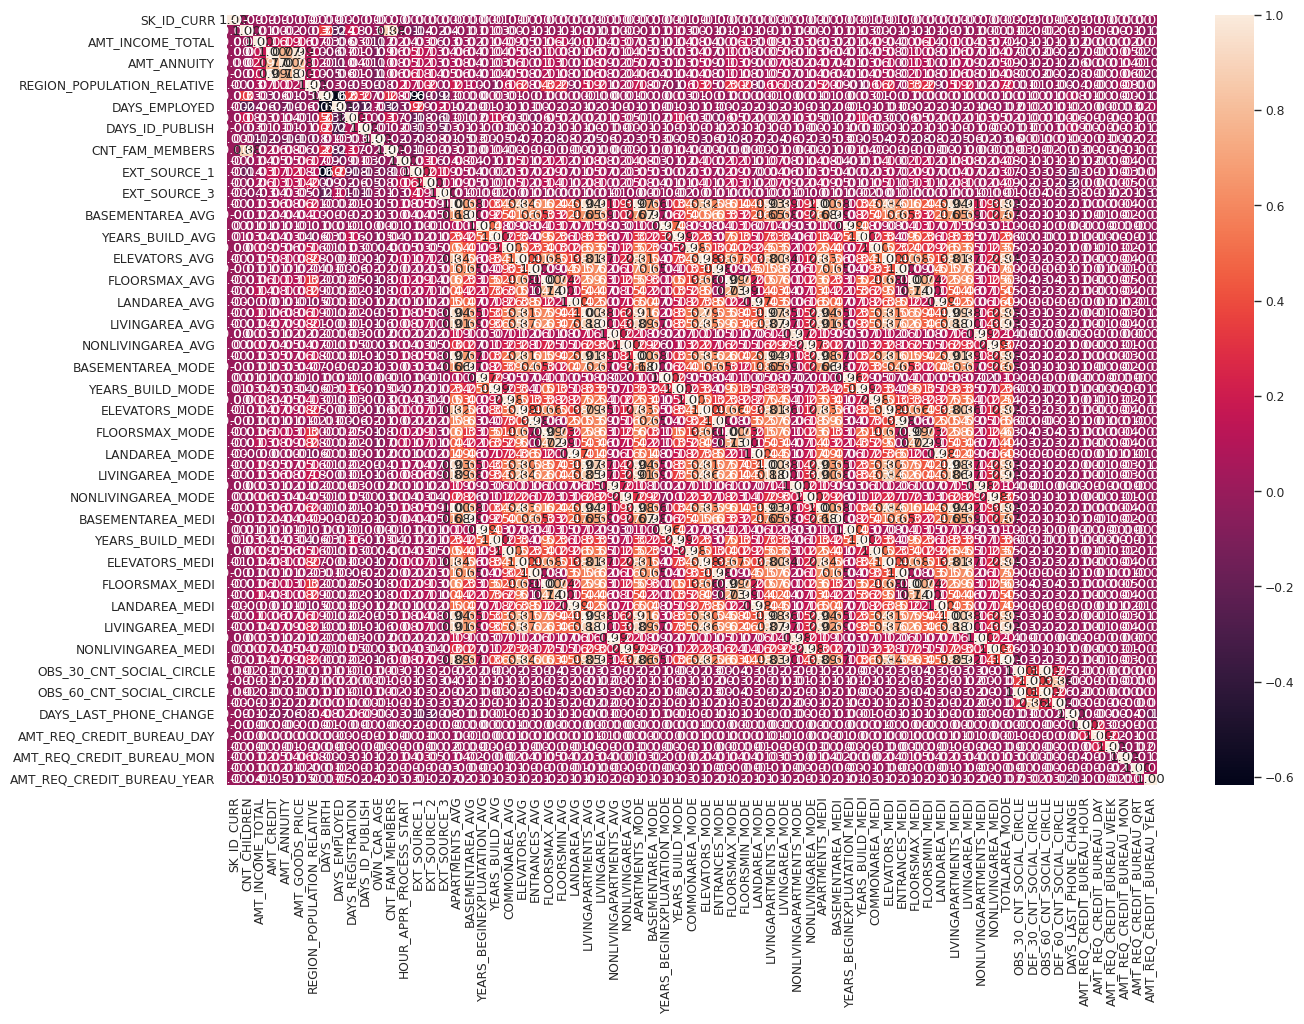

In [36]:
df_nums = df[NUMS]
plt.figure(figsize=(15,10))
sns.heatmap(df_nums.corr(), annot=True, fmt='.2f')

In [37]:
import pandas as pd

# Assuming you have df and NUMS defined
df_nums = df[NUMS]

# Calculate correlation matrix
corr_matrix = df_nums.corr()

# Exclude diagonal (self-correlation) with boolean indexing
corr_without_diag = corr_matrix.where(~np.triu(np.ones(corr_matrix.shape)).astype(bool))

# Sort by absolute correlation in descending order
sorted_corr = corr_without_diag.abs().stack().sort_values(ascending=False)

# Print top N correlations (adjust N as needed)
print("Highest Correlations (Excluding Same Column):")
print(sorted_corr)


Highest Correlations (Excluding Same Column):
YEARS_BUILD_MEDI              YEARS_BUILD_AVG                 0.998495
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998490
FLOORSMIN_MEDI                FLOORSMIN_AVG                   0.997241
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997034
ENTRANCES_MEDI                ENTRANCES_AVG                   0.996886
ELEVATORS_MEDI                ELEVATORS_AVG                   0.996099
COMMONAREA_MEDI               COMMONAREA_AVG                  0.995978
LIVINGAREA_MEDI               LIVINGAREA_AVG                  0.995596
APARTMENTS_MEDI               APARTMENTS_AVG                  0.995081
BASEMENTAREA_MEDI             BASEMENTAREA_AVG                0.994317
LIVINGAPARTMENTS_MEDI         LIVINGAPARTMENTS_AVG            0.993825
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993825
LANDAREA_MEDI                 LANDAREA_AVG                    0.991610
NONLIVINGAPARTMENTS_MEDI      N

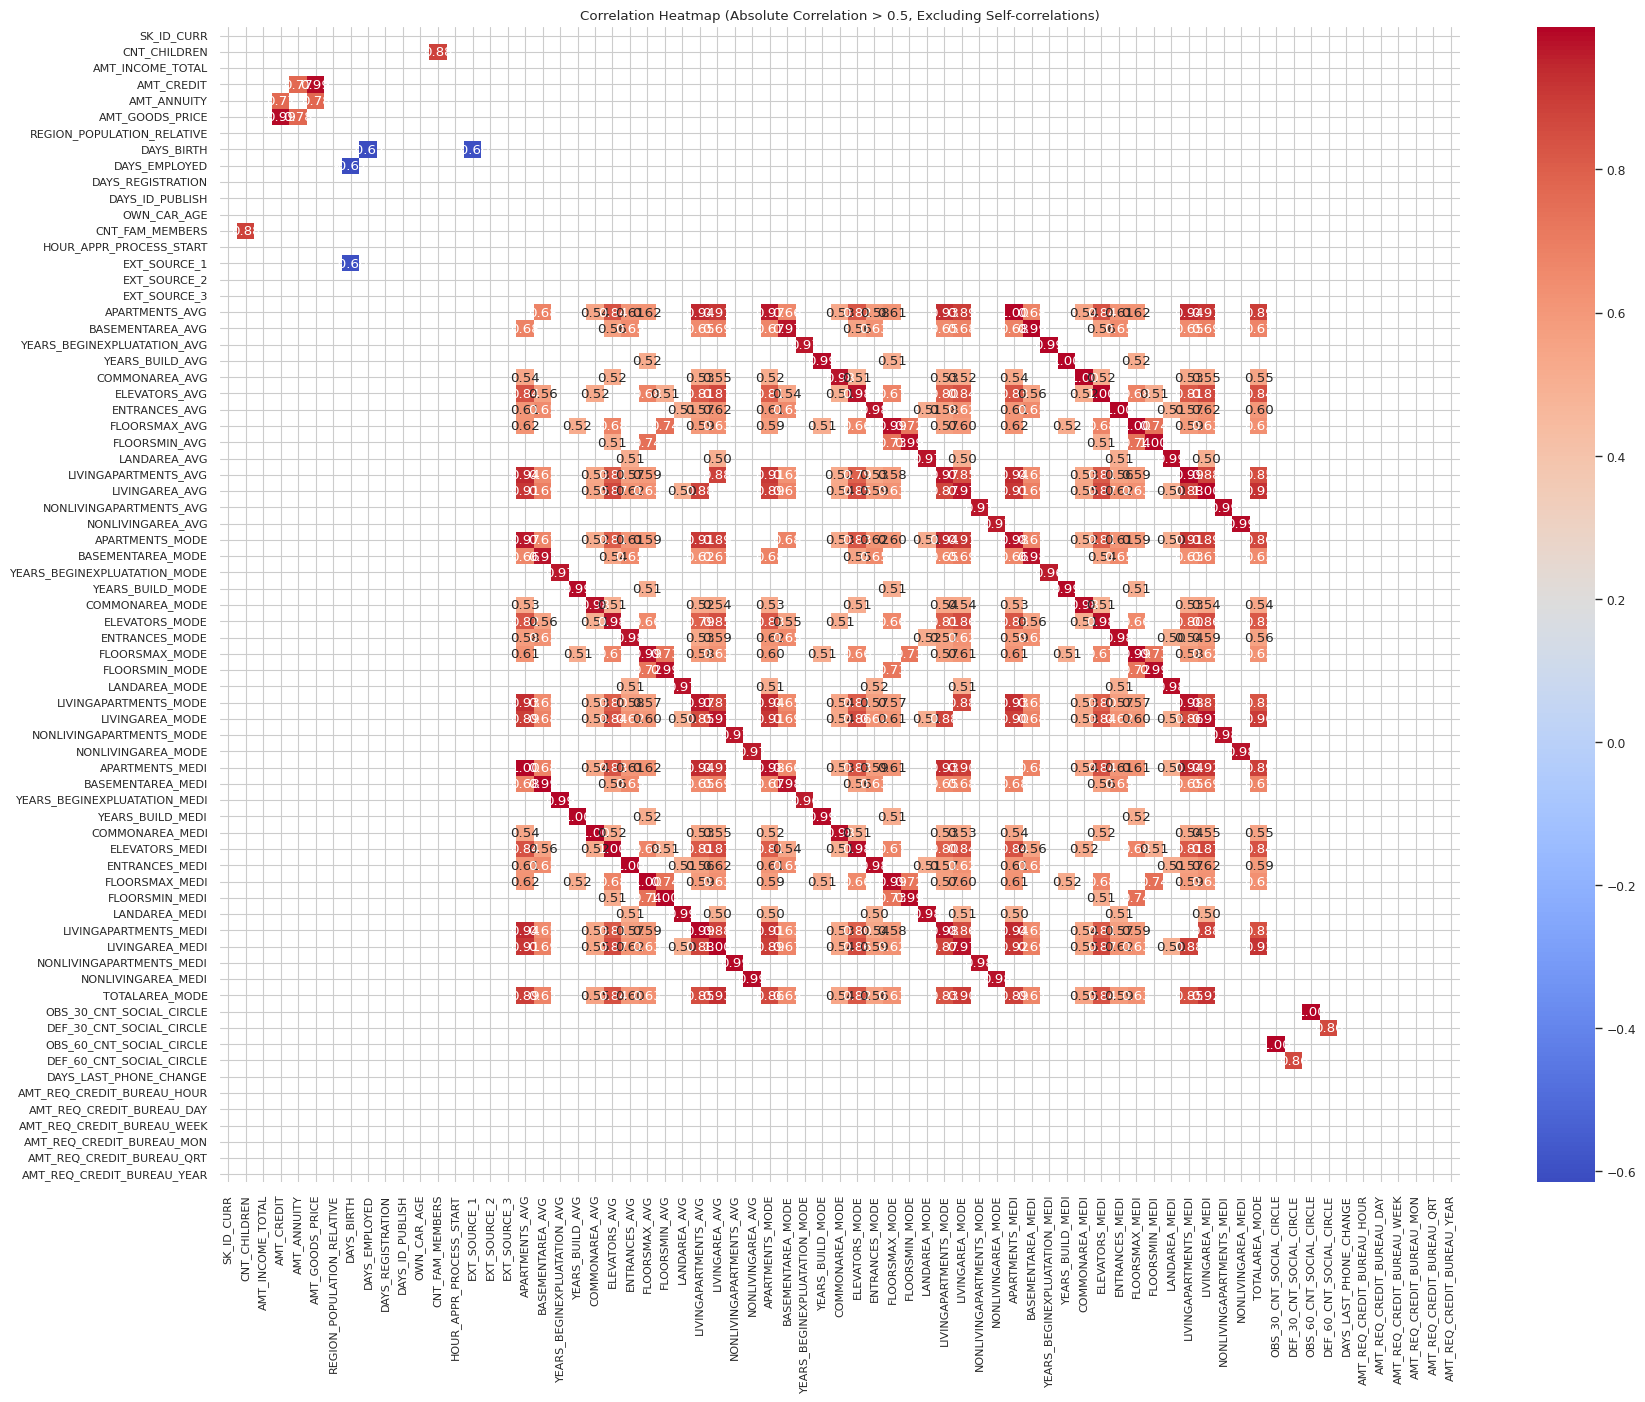

In [38]:

corr_matrix = df_nums.corr()

threshold = 0.5

mask = (corr_matrix.abs() > threshold) & (corr_matrix != 1)

plt.figure(figsize=(20, 15))

sns.heatmap(corr_matrix[mask], annot=True, fmt='.2f', cmap='coolwarm')

plt.yticks(rotation=0)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.title('Correlation Heatmap (Absolute Correlation > 0.5, Excluding Self-correlations)')
plt.show()


In [39]:
df[NUMS].head()


SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0      100002             0          202500.0    406597.5      24700.5   
1      100003             0          270000.0   1293502.5      35698.5   
2      100004             0           67500.0    135000.0       6750.0   
3      100006             0          135000.0    312682.5      29686.5   
4      100007             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461           -637   
1        1129500.0                    0.003541      -16765          -1188   
2         135000.0                    0.010032      -19046           -225   
3         297000.0                    0.008019      -19005          -3039   
4         513000.0                    0.028663      -19932          -3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120          NaN              1.0   
1            -1186.0             -291          NaN              2.0   
2            -4260.0            -2531         26.0              1.0   
3            -9833.0            -2437          NaN              2.0   
4            -4311.0            -3458          NaN              1.0   

   HOUR_APPR_PROCESS_START  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                       10      0.083037      0.262949      0.139376   
1                       11      0.311267      0.622246           NaN   
2                        9           NaN      0.555912      0.729567   
3                       17           NaN      0.650442           NaN   
4                       11           NaN      0.322738           NaN   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2             NaN               NaN                          NaN   
3             NaN               NaN                          NaN   
4             NaN               NaN                          NaN   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2              NaN             NaN            NaN            NaN   
3              NaN             NaN            NaN            NaN   
4              NaN             NaN            NaN            NaN   

   FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  \
0         0.0833         0.1250        0.0369                0.0202   
1         0.2917         0.3333        0.0130                0.0773   
2            NaN            NaN           NaN                   NaN   
3            NaN            NaN           NaN                   NaN   
4            NaN            NaN           NaN                   NaN   

   LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
0          0.0190                   0.0000             0.0000   
1          0.0549                   0.0039             0.0098   
2             NaN                      NaN                NaN   
3             NaN                      NaN                NaN   
4             NaN                      NaN                NaN   

   APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  \
0           0.0252             0.0383                        0.9722   
1           0.0924             0.0538                        0.9851   
2              NaN                NaN                           NaN   
3              NaN                NaN                           NaN   
4              NaN                NaN                           NaN   

   YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  \
0            0.6341           0.0144          0.0000          0.0690   
1            0.8040         

In [40]:
# categorical
from scipy.stats import chi2_contingency
cats2 = CATS
chi2_array, p_array = [], []
for column in cats2:

    crosstab = pd.crosstab(df[column], df['TARGET'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': cats2,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi.sort_values(by='Chi-square', ascending=False)

Variable     Chi-square        p-value
0                        TARGET  307497.525179   0.000000e+00
27            ORGANIZATION_TYPE    1609.240636  5.224541e-299
10              OCCUPATION_TYPE    1402.846796  3.784500e-288
6              NAME_INCOME_TYPE    1253.470808  1.928146e-266
18  REGION_RATING_CLIENT_W_CITY    1143.446338  5.055715e-249
17         REGION_RATING_CLIENT    1067.192692  1.828316e-232
7           NAME_EDUCATION_TYPE    1019.213187  2.447681e-219
2                   CODE_GENDER     920.791334  1.129022e-200
24       REG_CITY_NOT_WORK_CITY     799.218045  7.981277e-176
12               FLAG_EMP_PHONE     649.751181  2.530606e-143
23       REG_CITY_NOT_LIVE_CITY     605.481659  1.075235e-133
33              FLAG_DOCUMENT_3     604.391958  1.855748e-133
8            NAME_FAMILY_STATUS     504.694083  7.744842e-107
9             NAME_HOUSING_TYPE     420.556190   1.099089e-88
25      LIVE_CITY_NOT_WORK_CITY     324.864271   1.262939e-72
1            NAME_CONTRACT_TYPE     293.150542   1.023515e-65
36              FLAG_DOCUMENT_6     251.194642   1.425605e-56
13              FLAG_WORK_PHONE     249.940305   2.675800e-56
15                   FLAG_PHONE     174.084004   9.489418e-40
3                  FLAG_OWN_CAR     146.656018   9.330994e-34
30           WALLSMATERIAL_MODE     139.235314   1.453180e-27
46             FLAG_DOCUMENT_16      41.054496   1.480432e-10
43             FLAG_DOCUMENT_13      40.544766   1.921626e-10
5               NAME_TYPE_SUITE      32.825315   1.132931e-05
29               HOUSETYPE_MODE      27.632556   9.992328e-07
44             FLAG_DOCUMENT_14      26.903604   2.138598e-07
31          EMERGENCYSTATE_MODE      23.678150   1.138680e-06
38              FLAG_DOCUMENT_8      19.772100   8.724696e-06
48             FLAG_DOCUMENT_18      19.123403   1.225331e-05
28           FONDKAPREMONT_MODE      16.809897   7.732982e-04
26   WEEKDAY_APPR_PROCESS_START      15.387557   1.744737e-02
19   WEEKDAY_APPR_PROCESS_START      15.387557   1.744737e-02
21   REG_REGION_NOT_WORK_REGION      14.703127   1.258375e-04
45             FLAG_DOCUMENT_15      12.454144   4.170655e-04
4               FLAG_OWN_REALTY      11.575827   6.681470e-04
20   REG_REGION_NOT_LIVE_REGION       9.394008   2.176958e-03
32              FLAG_DOCUMENT_2       6.224739   1.259775e-02
39              FLAG_DOCUMENT_9       5.571672   1.825333e-02
41             FLAG_DOCUMENT_11       5.254677   2.188786e-02
51             FLAG_DOCUMENT_21       3.518213   6.069787e-02
47             FLAG_DOCUMENT_17       2.789807   9.486563e-02
22  LIVE_REGION_NOT_WORK_REGION       2.392424   1.219245e-01
34              FLAG_DOCUMENT_4       1.242490   2.649918e-01
16                   FLAG_EMAIL       0.923096   3.366633e-01
49             FLAG_DOCUMENT_19       0.380782   5.371848e-01
37              FLAG_DOCUMENT_7       0.364390   5.460784e-01
35              FLAG_DOCUMENT_5       0.021899   8.823564e-01
14             FLAG_CONT_MOBILE       0.016530   8.976990e-01
40             FLAG_DOCUMENT_10       0.008159   9.280282e-01
42             FLAG_DOCUMENT_12       0.000000   1.000000e+00
11                   FLAG_MOBIL       0.000000   1.000000e+00
50             FLAG_DOCUMENT_20       0.000000   1.000000e+00

In [41]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your dataframe is called 'df' and the target variable is 'TARGET'
# Categorical columns are listed in 'CATS'

cats2 = CATS
alpha = 0.05  # Significance level (commonly used)
reject_list = []
chi2_array, p_array = [], []

for column in cats2:
    crosstab = pd.crosstab(df[column], df['TARGET'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

    # Reject null hypothesis if p-value is less than alpha
    reject_list.append(p < alpha)

df_chi = pd.DataFrame({
    'Variable': cats2,
    'Chi-square': chi2_array,
    'p-value': p_array,
    'Reject H0': reject_list  # Add new column for hypothesis rejection
})

# Filter columns that reject the null hypothesis
rejected_cols = df_chi[df_chi['Reject H0'] == True]['Variable'].tolist()

# Print the list of columns rejecting the null hypothesis
print("Columns Rejecting Null Hypothesis:", rejected_cols)

# Sort remaining DataFrame by chi-square (optional)
print(df_chi.sort_values(by='Chi-square', ascending=False))


Columns Rejecting Null Hypothesis: ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18']
                       Variable     Chi-square        p-value  Reject H0
0                        TARGET  307497.525179   0.000000e+

# Data preprocessing

## drop kolom

In [42]:
df_fe = df.copy()

In [43]:
len(df_fe.columns)

122

In [44]:
#delete unnecessary column
delete_clmn_nums = [
    'CNT_CHILDREN', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'BASEMENTAREA_AVG',
    'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
    'FLOORSMIN_AVG',	'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG'	,'LIVINGAREA_AVG',
    'APARTMENTS_MODE',	'BASEMENTAREA_MODE',	'YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BUILD_MODE',	'COMMONAREA_MODE',	'ELEVATORS_MODE',	'ENTRANCES_MODE',
    'FLOORSMAX_MODE',	'FLOORSMIN_MODE',	'LANDAREA_MODE',	'LIVINGAPARTMENTS_MODE',
    'LIVINGAREA_MODE',	'NONLIVINGAPARTMENTS_MODE',	'NONLIVINGAREA_MODE',
    'APARTMENTS_MEDI',	'BASEMENTAREA_MEDI',	'YEARS_BEGINEXPLUATATION_MEDI',
    'YEARS_BUILD_MEDI',	'COMMONAREA_MEDI',	'ELEVATORS_MEDI',	'ENTRANCES_MEDI',
    'FLOORSMAX_MEDI',	'FLOORSMIN_MEDI',	'LANDAREA_MEDI',	'LIVINGAPARTMENTS_MEDI',
    'LIVINGAREA_MEDI',	'NONLIVINGAPARTMENTS_MEDI',	'NONLIVINGAREA_MEDI',	'TOTALAREA_MODE']
del_clmn_cats = [
    'FLAG_DOCUMENT_21','FLAG_DOCUMENT_17', 'LIVE_REGION_NOT_WORK_REGION',
    'FLAG_DOCUMENT_4', 'FLAG_EMAIL', 'FLAG_DOCUMENT_19','FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_5' ,'FLAG_CONT_MOBILE','FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_12', 'FLAG_MOBIL', 'FLAG_DOCUMENT_20']

In [45]:
df_fe = df.drop(columns = delete_clmn_nums)

In [46]:
df_fe = df.drop(columns = del_clmn_cats)

In [47]:
print(list_null_above_thresh)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

In [48]:
df_fe = df.drop(columns = list_null_above_thresh)

In [49]:
df_fe = df_fe.drop('SK_ID_CURR', axis=1)

In [50]:
df_fe.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0   Bad Payment History         Cash loans           M            N   
1  Good Payment History         Cash loans           F            N   
2  Good Payment History    Revolving loans           M            Y   
3  Good Payment History         Cash loans           F            N   
4  Good Payment History         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0               

In [51]:
df_fe['TARGET'].value_counts()

Good Payment History    282686
Bad Payment History      24825
Name: TARGET, dtype: int64

In [52]:
df_fe.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
  

In [53]:
len(df_fe.columns)

72

##REPLACE NULL

In [54]:
list_items = []
for col in df_fe.columns:
  list_items.append([col, df_fe[col].dtype, df_fe[col].isna().sum(), 100*df_fe[col].isna().sum()/len(df_fe[col]), df_fe[col].nunique(), df_fe[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_items, columns= 'Feature, Data Type, Null, Null %, Unique, Unique Sample'.split(','))
desc_df

Feature  Data Type   Null     Null %   Unique  \
0                        TARGET     object      0   0.000000        2   
1            NAME_CONTRACT_TYPE     object      0   0.000000        2   
2                   CODE_GENDER     object      0   0.000000        3   
3                  FLAG_OWN_CAR     object      0   0.000000        2   
4               FLAG_OWN_REALTY     object      0   0.000000        2   
5                  CNT_CHILDREN      int64      0   0.000000       15   
6              AMT_INCOME_TOTAL    float64      0   0.000000     2548   
7                    AMT_CREDIT    float64      0   0.000000     5603   
8                   AMT_ANNUITY    float64     12   0.003902    13672   
9               AMT_GOODS_PRICE    float64    278   0.090403     1002   
10              NAME_TYPE_SUITE     object   1292   0.420148        7   
11             NAME_INCOME_TYPE     object      0   0.000000        8   
12          NAME_EDUCATION_TYPE     object      0   0.000000        5   
13           NAME_FAMILY_STATUS     object      0   0.000000        6   
14            NAME_HOUSING_TYPE     object      0   0.000000        6   
15   REGION_POPULATION_RELATIVE    float64      0   0.000000       81   
16                   DAYS_BIRTH      int64      0   0.000000    17460   
17                DAYS_EMPLOYED      int64      0   0.000000    12574   
18            DAYS_REGISTRATION    float64      0   0.000000    15688   
19              DAYS_ID_PUBLISH      int64      0   0.000000     6168   
20                   FLAG_MOBIL      int64      0   0.000000        2   
21               FLAG_EMP_PHONE      int64      0   0.000000        2   
22              FLAG_WORK_PHONE      int64      0   0.000000        2   
23             FLAG_CONT_MOBILE      int64      0   0.000000        2   
24                   FLAG_PHONE      int64      0   0.000000        2   
25                   FLAG_EMAIL      int64      0   0.000000        2   
26              OCCUPATION_TYPE     object  96391  31.345545       18   
27              CNT_FAM_MEMBERS    float64      2   0.000650       17   
28         REGION_RATING_CLIENT      int64      0   0.000000        3   
29  REGION_RATING_CLIENT_W_CITY      int64      0   0.000000        3   
30   WEEKDAY_APPR_PROCESS_START     object      0   0.000000        7   
31      HOUR_APPR_PROCESS_START      int64      0   0.000000       24   
32   REG_REGION_NOT_LIVE_REGION      int64      0   0.000000        2   
33   REG_REGION_NOT_WORK_REGION      int64      0   0.000000        2   
34  LIVE_REGION_NOT_WORK_REGION      int64      0   0.000000        2   
35       REG_CITY_NOT_LIVE_CITY      int64      0   0.000000        2   
36       REG_CITY_NOT_WORK_CITY      int64      0   0.000000        2   
37      LIVE_CITY_NOT_WORK_CITY      int64      0   0.000000        2   
38            ORGANIZATION_TYPE     object      0   0.000000       58   
39                 EXT_SOURCE_2    float64    660   0.214626   119831   
40                 EXT_SOURCE_3    float64  60965  19.825307      814   
41     OBS_30_CNT_SOCIAL_CIRCLE    float64   1021   0.332021       33   
42     DEF_30_CNT_SOCIAL_CIRCLE    float64   1021   0.332021       10   
43     OBS_60_CNT_SOCIAL_CIRCLE    float64   1021   0.332021       33   
44     DEF_60_CNT_SOCIAL_CIRCLE    float64   1021   0.332021        9   
45       DAYS_LAST_PHONE_CHANGE    float64      1   0.000325     3773   
46              FLAG_DOCUMENT_2      int64      0   0.000000        2   
47              FLAG_DOCUMENT_3      int64      0   0.000000        2   
48              FLAG_DOCUMENT_4      int64      0   0.000000        2   
49              FLAG_DOCUMENT_5      int64      0   0.000000        2   
50              FLAG_DOCUMENT_6      int64      0   0.000000        2   
51              FLAG_DOCUMENT_7      int64      0   0.000000        2   
52              FLAG_DOCUMENT_8      int64      0   0.000000        2   
53              FLAG_DOCUMENT_9      int64      0   0.000000        2   
54       

In [55]:
print('Missing values status:', df_fe.isnull().values.any())
nvc = pd.DataFrame(df_fe.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df_fe.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


index  Total Null Values  Percentage
0               OCCUPATION_TYPE              96391   31.345545
1                  EXT_SOURCE_3              60965   19.825307
2    AMT_REQ_CREDIT_BUREAU_YEAR              41519   13.501631
3    AMT_REQ_CREDIT_BUREAU_WEEK              41519   13.501631
4     AMT_REQ_CREDIT_BUREAU_DAY              41519   13.501631
5     AMT_REQ_CREDIT_BUREAU_MON              41519   13.501631
6     AMT_REQ_CREDIT_BUREAU_QRT              41519   13.501631
7    AMT_REQ_CREDIT_BUREAU_HOUR              41519   13.501631
8               NAME_TYPE_SUITE               1292    0.420148
9      OBS_60_CNT_SOCIAL_CIRCLE               1021    0.332021
10     DEF_30_CNT_SOCIAL_CIRCLE               1021    0.332021
11     OBS_30_CNT_SOCIAL_CIRCLE               1021    0.332021
12     DEF_60_CNT_SOCIAL_CIRCLE               1021    0.332021
13                 EXT_SOURCE_2                660    0.214626
14              AMT_GOODS_PRICE                278    0.090403
15                  AMT_ANNUITY                 12    0.003902
16              CNT_FAM_MEMBERS                  2    0.000650
17       DAYS_LAST_PHONE_CHANGE                  1    0.000325
18   REG_REGION_NOT_LIVE_REGION                  0    0.000000
19               FLAG_EMP_PHONE                  0    0.000000
20             NAME_INCOME_TYPE                  0    0.000000
21             AMT_INCOME_TOTAL                  0    0.000000
22                 CNT_CHILDREN                  0    0.000000
23              FLAG_OWN_REALTY                  0    0.000000
24                 FLAG_OWN_CAR                  0    0.000000
25                  CODE_GENDER                  0    0.000000
26           NAME_CONTRACT_TYPE                  0    0.000000
27                   AMT_CREDIT                  0    0.000000
28              DAYS_ID_PUBLISH                  0    0.000000
29                   DAYS_BIRTH                  0    0.000000
30              FLAG_WORK_PHONE                  0    0.000000
31                   FLAG_EMAIL                  0    0.000000
32                   FLAG_PHONE                  0    0.000000
33             FLAG_CONT_MOBILE                  0    0.000000
34                   FLAG_MOBIL                  0    0.000000
35            DAYS_REGISTRATION                  0    0.000000
36                       TARGET                  0    0.000000
37           NAME_FAMILY_STATUS                  0    0.000000
38              FLAG_DOCUMENT_4                  0    0.000000
39             FLAG_DOCUMENT_10                  0    0.000000
40              FLAG_DOCUMENT_8                  0    0.000000
41      HOUR_APPR_PROCESS_START                  0    0.000000
42              FLAG_DOCUMENT_7                  0    0.000000
43              FLAG_DOCUMENT_6                  0    0.000000
44              FLAG_DOCUMENT_5                  0    0.000000
45              FLAG_DOCUMENT_3                  0    0.000000
46             FLAG_DOCUMENT_12                  0    0.000000
47              FLAG_DOCUMENT_2                  0    0.000000
48            ORGANIZATION_TYPE                  0    0.000000
49      LIVE_CITY_NOT_WORK_CITY                  0    0.000000
50       REG_CITY_NOT_WORK_CITY                  0    0.000000
51  LIVE_REGION_NOT_WORK_REGION                  0    0.000000
52   REG_REGION_NOT_WORK_REGION                  0    0.000000
53             FLAG_DOCUMENT_11                  0    0.000000
54             FLAG_DOCUMENT_13                  0    0.000000
55            NAME_HOUSING_TYPE                  0    0.000000
56              FLAG_DOCUMENT_9                  0    0.000000
57   REGION_POPULATION_RELATIVE                  0    0.000000
58  REGION_RATING_CLIENT_W_CITY                  0    0.000000
59                DAYS_EMPLOYED                  0    0.000000
60         REGION_RATING_CLIENT                  0    0.000000
61       REG_CITY_NOT_LIVE_CITY                  0    0.000000
62   WEEKDAY_APPR_PROCESS_START                  0    0.0

In [56]:
nums = df_fe.select_dtypes(exclude = 'object')
cats = df_fe.select_dtypes(include = 'object')
print(" Kategorik:")
print(cats.columns)
print("\n Numerik:")
print(nums.columns)

 Kategorik:
Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

 Numerik:
Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_

In [57]:
list_items = []
for col in cats.columns:
  list_items.append([col, df_fe[col].dtype, df_fe[col].isna().sum(), 100*df_fe[col].isna().sum()/len(df_fe[col]), df_fe[col].nunique(), df_fe[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_items, columns= 'Feature, Data Type, Null, Null %, Unique, Unique Sample'.split(','))
desc_df

Feature  Data Type   Null     Null %   Unique  \
0                       TARGET     object      0   0.000000        2   
1           NAME_CONTRACT_TYPE     object      0   0.000000        2   
2                  CODE_GENDER     object      0   0.000000        3   
3                 FLAG_OWN_CAR     object      0   0.000000        2   
4              FLAG_OWN_REALTY     object      0   0.000000        2   
5              NAME_TYPE_SUITE     object   1292   0.420148        7   
6             NAME_INCOME_TYPE     object      0   0.000000        8   
7          NAME_EDUCATION_TYPE     object      0   0.000000        5   
8           NAME_FAMILY_STATUS     object      0   0.000000        6   
9            NAME_HOUSING_TYPE     object      0   0.000000        6   
10             OCCUPATION_TYPE     object  96391  31.345545       18   
11  WEEKDAY_APPR_PROCESS_START     object      0   0.000000        7   
12           ORGANIZATION_TYPE     object      0   0.000000       58   

                                                                                             Unique Sample  
0                                                              [Bad Payment History, Good Payment History]  
1                                                                            [Cash loans, Revolving loans]  
2                                                                                              [M, F, XNA]  
3                                                                                                   [N, Y]  
4                                                                                                   [Y, N]  
5                                              [Unaccompanied, Family, Spouse, partner, Children, Other_A]  
6                                    [Working, State servant, Commercial associate, Pensioner, Unemployed]  
7   [Secondary / secondary special, Higher education, Incomplete higher, Lower secondary, Academic degree]  
8                                        [Single / not married, Married, Civil marriage, Widow, Separated]  
9               [House / apartment, Rented apartment, With parents, Municipal apartment, Office apartment]  
10                                                      [Laborers, Core staff, Accountants, Managers, nan]  
11                                                         [WEDNESDAY, MONDAY, THURSDAY, SUNDAY, SATURDAY]  
12                                           [Business Entity Type 3, School, Government, Religion, Other]

In [58]:
df_fe.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0   Bad Payment History         Cash loans           M            N   
1  Good Payment History         Cash loans           F            N   
2  Good Payment History    Revolving loans           M            Y   
3  Good Payment History         Cash loans           F            N   
4  Good Payment History         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0               

In [59]:
list_items = []
for col in nums.columns:
  list_items.append([col, df_fe[col].dtype, df_fe[col].isna().sum(), 100*df_fe[col].isna().sum()/len(df_fe[col]), df_fe[col].nunique(), df_fe[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_items, columns= 'Feature, Data Type, Null, Null %, Unique, Unique Sample'.split(','))
desc_df

Feature  Data Type   Null     Null %   Unique  \
0                  CNT_CHILDREN      int64      0   0.000000       15   
1              AMT_INCOME_TOTAL    float64      0   0.000000     2548   
2                    AMT_CREDIT    float64      0   0.000000     5603   
3                   AMT_ANNUITY    float64     12   0.003902    13672   
4               AMT_GOODS_PRICE    float64    278   0.090403     1002   
5    REGION_POPULATION_RELATIVE    float64      0   0.000000       81   
6                    DAYS_BIRTH      int64      0   0.000000    17460   
7                 DAYS_EMPLOYED      int64      0   0.000000    12574   
8             DAYS_REGISTRATION    float64      0   0.000000    15688   
9               DAYS_ID_PUBLISH      int64      0   0.000000     6168   
10                   FLAG_MOBIL      int64      0   0.000000        2   
11               FLAG_EMP_PHONE      int64      0   0.000000        2   
12              FLAG_WORK_PHONE      int64      0   0.000000        2   
13             FLAG_CONT_MOBILE      int64      0   0.000000        2   
14                   FLAG_PHONE      int64      0   0.000000        2   
15                   FLAG_EMAIL      int64      0   0.000000        2   
16              CNT_FAM_MEMBERS    float64      2   0.000650       17   
17         REGION_RATING_CLIENT      int64      0   0.000000        3   
18  REGION_RATING_CLIENT_W_CITY      int64      0   0.000000        3   
19      HOUR_APPR_PROCESS_START      int64      0   0.000000       24   
20   REG_REGION_NOT_LIVE_REGION      int64      0   0.000000        2   
21   REG_REGION_NOT_WORK_REGION      int64      0   0.000000        2   
22  LIVE_REGION_NOT_WORK_REGION      int64      0   0.000000        2   
23       REG_CITY_NOT_LIVE_CITY      int64      0   0.000000        2   
24       REG_CITY_NOT_WORK_CITY      int64      0   0.000000        2   
25      LIVE_CITY_NOT_WORK_CITY      int64      0   0.000000        2   
26                 EXT_SOURCE_2    float64    660   0.214626   119831   
27                 EXT_SOURCE_3    float64  60965  19.825307      814   
28     OBS_30_CNT_SOCIAL_CIRCLE    float64   1021   0.332021       33   
29     DEF_30_CNT_SOCIAL_CIRCLE    float64   1021   0.332021       10   
30     OBS_60_CNT_SOCIAL_CIRCLE    float64   1021   0.332021       33   
31     DEF_60_CNT_SOCIAL_CIRCLE    float64   1021   0.332021        9   
32       DAYS_LAST_PHONE_CHANGE    float64      1   0.000325     3773   
33              FLAG_DOCUMENT_2      int64      0   0.000000        2   
34              FLAG_DOCUMENT_3      int64      0   0.000000        2   
35              FLAG_DOCUMENT_4      int64      0   0.000000        2   
36              FLAG_DOCUMENT_5      int64      0   0.000000        2   
37              FLAG_DOCUMENT_6      int64      0   0.000000        2   
38              FLAG_DOCUMENT_7      int64      0   0.000000        2   
39              FLAG_DOCUMENT_8      int64      0   0.000000        2   
40              FLAG_DOCUMENT_9      int64      0   0.000000        2   
41             FLAG_DOCUMENT_10      int64      0   0.000000        2   
42             FLAG_DOCUMENT_11      int64      0   0.000000        2   
43             FLAG_DOCUMENT_12      int64      0   0.000000        2   
44             FLAG_DOCUMENT_13      int64      0   0.000000        2   
45             FLAG_DOCUMENT_14      int64      0   0.000000        2   
46             FLAG_DOCUMENT_15      int64      0   0.000000        2   
47             FLAG_DOCUMENT_16      int64      0   0.000000        2   
48             FLAG_DOCUMENT_17      int64      0   0.000000        2   
49             FLAG_DOCUMENT_18      int64      0   0.000000        2   
50             FLAG_DOCUMENT_19      int64      0   0.000000        2   
51             FLAG_DOCUMENT_20      int64      0   0.000000        2   
52             FLAG_DOCUMENT_21      int64      0   0.000000        2   
53   AMT_REQ_CREDIT_BUREAU_HOUR    float64  41519  13.501631        5   
54    AMT

In [60]:
cats_col = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',]
nums_col = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [61]:
# For Numerical columns
# replace missing value with "Median"

for col in df_fe[nums_col]:
    df_fe[col] = df[col].fillna(df_fe[col].median())
df_fe.isnull().sum()

# For Categorical columns
# replace missing value with "Mode"

for col in df_fe[cats_col]:
    df_fe[col] = df_fe[col].fillna(df_fe[col].mode().iloc[0])
df_fe.isnull().sum()

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

## feature encoding

In [62]:
df_fe[cats_col].head(10)

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0   Bad Payment History         Cash loans           M            N   
1  Good Payment History         Cash loans           F            N   
2  Good Payment History    Revolving loans           M            Y   
3  Good Payment History         Cash loans           F            N   
4  Good Payment History         Cash loans           M            N   
5  Good Payment History         Cash loans           M            N   
6  Good Payment History         Cash loans           F            Y   
7  Good Payment History         Cash loans           M            Y   
8  Good Payment History         Cash loans           F            N   
9  Good Payment History    Revolving loans           M            N   

  FLAG_OWN_REALTY  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0               Y    Unaccompanied               Working   
1               N           Family         State servant   
2               Y    Unaccompanied               Working   
3               Y    Unaccompanied               Working   
4               Y    Unaccompanied               Working   
5               Y  Spouse, partner         State servant   
6               Y    Unaccompanied  Commercial associate   
7               Y    Unaccompanied         State servant   
8               Y         Children             Pensioner   
9               Y    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

  OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0        Laborers                  WEDNESDAY  Business Entity Type 3   
1      Core staff                     MONDAY                  School   
2        Laborers                     MONDAY              Government   
3        Laborers                  WEDNESDAY  Business Entity Type 3   
4      Core staff                   THURSDAY                Religion   
5        Laborers                  WEDNESDAY                   Other   
6     Accountants                     SUNDAY  Business Entity Type 3   
7        Managers                     MONDAY                   Other   
8        Laborers                  WEDNESDAY                     XNA   
9        Laborers                   THURSDAY             Electricity   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   
5           1               1                1                 1           1   
6           1               1                0                 1           1   
7           1               1                1                 1           0   
8           1               0                0                 1           0   
9           1               1                0                 1           0   

   FLAG_EMAIL  REG_REGION_NOT_LIVE_REGION  REG_REGIO

In [63]:
df_fe['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Drivers',
       'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [64]:
#label encoding
cats_col_label = ['FLAG_OWN_CAR',	'FLAG_OWN_REALTY']
prefix = ['gender', 'own_car', 'own_realty']
encoder = LabelEncoder()

for col in cats_col_label:
  df_fe[col] = encoder.fit_transform(df_fe[col])

print(f"Label encoded columns: {cats_col_label}")

Label encoded columns: ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']


In [65]:
df_fe.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0   Bad Payment History         Cash loans           M             0   
1  Good Payment History         Cash loans           F             0   
2  Good Payment History    Revolving loans           M             1   
3  Good Payment History         Cash loans           F             0   
4  Good Payment History         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0   

In [66]:
df_fe.describe().T

count           mean            std  \
FLAG_OWN_CAR                 307511.0       0.340108       0.473746   
FLAG_OWN_REALTY              307511.0       0.693673       0.460968   
CNT_CHILDREN                 307511.0       0.417052       0.722121   
AMT_INCOME_TOTAL             307511.0  168797.919297  237123.146279   
AMT_CREDIT                   307511.0  599025.999706  402490.776996   
AMT_ANNUITY                  307511.0   27108.487841   14493.461065   
AMT_GOODS_PRICE              307511.0  538316.294367  369288.982246   
REGION_POPULATION_RELATIVE   307511.0       0.020868       0.013831   
DAYS_BIRTH                   307511.0  -16036.995067    4363.988632   
DAYS_EMPLOYED                307511.0   63815.045904  141275.766519   
DAYS_REGISTRATION            307511.0   -4986.120328    3522.886321   
DAYS_ID_PUBLISH              307511.0   -2994.202373    1509.450419   
FLAG_MOBIL                   307511.0       0.999997       0.001803   
FLAG_EMP_PHONE               307511.0       0.819889       0.384280   
FLAG_WORK_PHONE              307511.0       0.199368       0.399526   
FLAG_CONT_MOBILE             307511.0       0.998133       0.043164   
FLAG_PHONE                   307511.0       0.281066       0.449521   
FLAG_EMAIL                   307511.0       0.056720       0.231307   
CNT_FAM_MEMBERS              307511.0       2.152664       0.910679   
REGION_RATING_CLIENT         307511.0       2.052463       0.509034   
REGION_RATING_CLIENT_W_CITY  307511.0       2.031521       0.502737   
HOUR_APPR_PROCESS_START      307511.0      12.063419       3.265832   
REG_REGION_NOT_LIVE_REGION   307511.0       0.015144       0.122126   
REG_REGION_NOT_WORK_REGION   307511.0       0.050769       0.219526   
LIVE_REGION_NOT_WORK_REGION  307511.0       0.040659       0.197499   
REG_CITY_NOT_LIVE_CITY       307511.0       0.078173       0.268444   
REG_CITY_NOT_WORK_CITY       307511.0       0.230454       0.421124   
LIVE_CITY_NOT_WORK_CITY      307511.0       0.179555       0.383817   
EXT_SOURCE_2                 307511.0       0.514503       0.190870   
EXT_SOURCE_3                 307511.0       0.515695       0.174736   
OBS_30_CNT_SOCIAL_CIRCLE     307511.0       1.417523       2.398395   
DEF_30_CNT_SOCIAL_CIRCLE     307511.0       0.142944       0.446033   
OBS_60_CNT_SOCIAL_CIRCLE     307511.0       1.400626       2.377224   
DEF_60_CNT_SOCIAL_CIRCLE     307511.0       0.099717       0.361735   
DAYS_LAST_PHONE_CHANGE       307511.0    -962.858119     826.807226   
FLAG_DOCUMENT_2              307511.0       0.000042       0.006502   
FLAG_DOCUMENT_3              307511.0       0.710023       0.453752   
FLAG_DOCUMENT_4              307511.0       0.000081       0.009016   
FLAG_DOCUMENT_5              307511.0       0.015115       0.122010   
FLAG_DOCUMENT_6              307511.0       0.088055       0.283376   
FLAG_DOCUMENT_7              307511.0       0.000192       0.013850   
FLAG_DOCUMENT_8              307511.0       0.081376       0.273412   
FLAG_DOCUMENT_9              307511.0       0.003896       0.062295   
FLAG_DOCUMENT_10             307511.0       0.000023       0.004771   
FLAG_DOCUMENT_11             307511.0       0.003912       0.062424   
FLAG_DOCUMENT_12             307511.0       0.000007       0.002550   
FLAG_DOCUMENT_13             307511.0       0.003525       0.059268   
FLAG_DOCUMENT_14             307511.0       0.002936       0.054110   
FLAG_DOCUMENT_15             307511.0       0.001210       0.034760   
FLAG_DOCUMENT_16             307511.0       0.009928       0.099144   
FLAG_DOCUMENT_17             307511.0       0.000267       0.016327   
FLAG_DOCUMENT_18             307511.0       0.008130       0.089798   
FLAG_DOCUMENT_19             307511.0       0.000595       0.024387   
FLAG_DOCUMENT_20             307511.0       0.000507       0.022518   
FLAG_DOCUMENT_21             307511.0       0.000335       0.018299   
AMT_REQ_CREDIT_BUREAU_HOUR   307511.0       0.005538    

In [67]:
mapping = {"Good Payment History": 0, "Bad Payment History": 1}

df_fe['TARGET'] = df_fe['TARGET'].replace(mapping)

In [68]:
df_fe.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1         Cash loans           M             0                1   
1       0         Cash loans           F             0                0   
2       0    Revolving loans           M             1                1   
3       0         Cash loans           F             0                1   
4       0         Cash loans           M             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0       -9461           -637            -3648.0            -2120           1   
1      -16765          -1188            -1186.0             -291           1   
2      -19046           -225            -4260.0            -2531           1   
3      -19005          -3039            -9833.0            -2437           1   
4      -19932          -3038            -4311.0            -3458           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                         

In [69]:
df_fe1 = df_fe.copy()

In [70]:
df_fe1.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1         Cash loans           M             0                1   
1       0         Cash loans           F             0                0   
2       0    Revolving loans           M             1                1   
3       0         Cash loans           F             0                1   
4       0         Cash loans           M             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0       -9461           -637            -3648.0            -2120           1   
1      -16765          -1188            -1186.0             -291           1   
2      -19046           -225            -4260.0            -2531           1   
3      -19005          -3039            -9833.0            -2437           1   
4      -19932          -3038            -4311.0            -3458           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                         

In [71]:
df_fe1['DAYS_BIRTH'] = df_fe1['DAYS_BIRTH']/-.1

df_fe1['DAYS_EMPLOYED'] = df_fe1['DAYS_EMPLOYED']/-.1
df_fe1['DAYS_REGISTRATION'] = df_fe1['DAYS_REGISTRATION']/-.1
df_fe1['DAYS_ID_PUBLISH'] = df_fe1['DAYS_ID_PUBLISH']/-.1
df_fe1['DAYS_LAST_PHONE_CHANGE'] = df_fe1['DAYS_LAST_PHONE_CHANGE']/-.1

## one hot ENCODING

In [72]:
df_fe1['ORGANIZATION_TYPE'].nunique()

58

In [73]:
df_fe1 = df_fe1.drop(columns = 'ORGANIZATION_TYPE')

In [74]:
df_fe1.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1         Cash loans           M             0                1   
1       0         Cash loans           F             0                0   
2       0    Revolving loans           M             1                1   
3       0         Cash loans           F             0                1   
4       0         Cash loans           M             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0     94610.0         6370.0            36480.0          21200.0           1   
1    167650.0        11880.0            11860.0           2910.0           1   
2    190460.0         2250.0            42600.0          25310.0           1   
3    190050.0        30390.0            98330.0          24370.0           1   
4    199320.0        30380.0            43110.0          34580.0           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                         

In [75]:
COLUMN = [
    'NAME_CONTRACT_TYPE',	'CODE_GENDER', 'NAME_TYPE_SUITE',
    'NAME_INCOME_TYPE',	'NAME_EDUCATION_TYPE',	'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START']
prefix = ['contract', 'gender', 'type_suite', 'income', 'education', 'family_status', 'houseing_type', 'occupation', 'weekday_process_start']
df_fe1 = pd.get_dummies(df_fe1, columns=COLUMN, prefix=prefix)
df_fe1.head()

TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0       1             0                1             0          202500.0   
1       0             0                0             0          270000.0   
2       0             1                1             0           67500.0   
3       0             0                1             0          135000.0   
4       0             0                1             0          121500.0   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
0    406597.5      24700.5         351000.0                    0.018801   
1   1293502.5      35698.5        1129500.0                    0.003541   
2    135000.0       6750.0         135000.0                    0.010032   
3    312682.5      29686.5         297000.0                    0.008019   
4    513000.0      21865.5         513000.0                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0     94610.0         6370.0            36480.0          21200.0           1   
1    167650.0        11880.0            11860.0           2910.0           1   
2    190460.0         2250.0            42600.0          25310.0           1   
3    190050.0        30390.0            98330.0          24370.0           1   
4    199320.0        30380.0            43110.0          34580.0           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246      0.535276                       1.0   
2      0.555912      0.729567                       0.0   
3      0.650442      0.535276                       2.0   
4      0.322738      0.535276                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0       

## STANDARSCALLE, MINMAX SCALLER

In [76]:
print(normal_columns)
print(non_normal_columns)

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE

In [77]:
# Get existing columns
existing_columns = list(df_fe1.columns)

normal_columns = [col for col in normal_columns if col in existing_columns]
non_normal_columns = [col for col in non_normal_columns if col in existing_columns]

print(f"Normal Columns: {normal_columns}")
print(f"Non-Normal Columns: {non_normal_columns}")


Normal Columns: ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
Non-Normal Columns: ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START']


In [78]:
# standar scaler
scaler = StandardScaler()

# transform data non normal
df_fe1[non_normal_columns] = scaler.fit_transform(df_fe1[non_normal_columns])

# minmax scaler
minmax = MinMaxScaler()

# transform data normal
df_fe1[normal_columns] = minmax.fit_transform(df_fe1[normal_columns])

#modelling

## SPLIT DATA

In [79]:
X = df_fe1.drop('TARGET', axis=1)
y = df_fe['TARGET']

In [80]:
# bagi data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
print('Data train: ',X_train.shape, y_train.shape)

Data train:  (246008, 123) (246008,)


## Modeling

In [82]:
# logistic regression
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
# decision tree
tree = DecisionTreeClassifier()

# fit model
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [84]:
from sklearn.ensemble import RandomForestClassifier

randf = RandomForestClassifier()
randf.fit(X_train, y_train)

RandomForestClassifier()

## evaluation

In [85]:
#model evaluation

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("\nPrecision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("\nRecall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("\nF1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

def roc_auc_eval(model):
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("\nroc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

eval_classification(logreg)
roc_auc_eval(logreg)

Accuracy (Test Set): 0.92
Accuracy (Train set): 0.92

Precision (Test Set): 0.44
Precision (Train Set): 0.47

Recall (Test Set): 0.01
Recall (Train Set): 0.01

F1-Score (Test Set): 0.02
F1-Score (Train Set): 0.02

roc_auc (test-proba): 0.74
roc_auc (train-proba): 0.74


In [87]:
eval_classification(tree)
roc_auc_eval(tree)

Accuracy (Test Set): 0.85
Accuracy (Train set): 1.00

Precision (Test Set): 0.14
Precision (Train Set): 1.00

Recall (Test Set): 0.16
Recall (Train Set): 1.00

F1-Score (Test Set): 0.15
F1-Score (Train Set): 1.00

roc_auc (test-proba): 0.54
roc_auc (train-proba): 1.00


In [88]:
eval_classification(randf)
roc_auc_eval(randf)

Accuracy (Test Set): 0.92
Accuracy (Train set): 1.00

Precision (Test Set): 0.69
Precision (Train Set): 1.00

Recall (Test Set): 0.00
Recall (Train Set): 1.00

F1-Score (Test Set): 0.00
F1-Score (Train Set): 1.00

roc_auc (test-proba): 0.71
roc_auc (train-proba): 1.00


## grid search

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid = {
    'C': [0.1, 1, 10, 100],
}

grid_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100]}, scoring='accuracy')

In [91]:
best_params = grid_logreg.best_params_

print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'C': 0.1}


In [93]:
best_logreg = LogisticRegression(C=best_params['C'])
best_logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [94]:
feature_importances = best_logreg.coef_[0]

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(importance_df)

                                     Feature  Importance
5                                AMT_ANNUITY    1.429183
33                  DEF_60_CNT_SOCIAL_CIRCLE    1.267098
31                  DEF_30_CNT_SOCIAL_CIRCLE    1.171930
36                           FLAG_DOCUMENT_3    0.372322
79                         income_Unemployed    0.325082
13                            FLAG_EMP_PHONE    0.318295
20               REGION_RATING_CLIENT_W_CITY    0.308064
39                           FLAG_DOCUMENT_6    0.296027
38                           FLAG_DOCUMENT_5    0.282831
84                 education_Lower secondary    0.267258
107            occupation_Low-skill Laborers    0.263880
35                           FLAG_DOCUMENT_2    0.261538
80                            income_Working    0.244324
25                    REG_CITY_NOT_LIVE_CITY    0.231735
42                           FLAG_DOCUMENT_9    0.231447
74               income_Commercial associate    0.185553
41                           FL

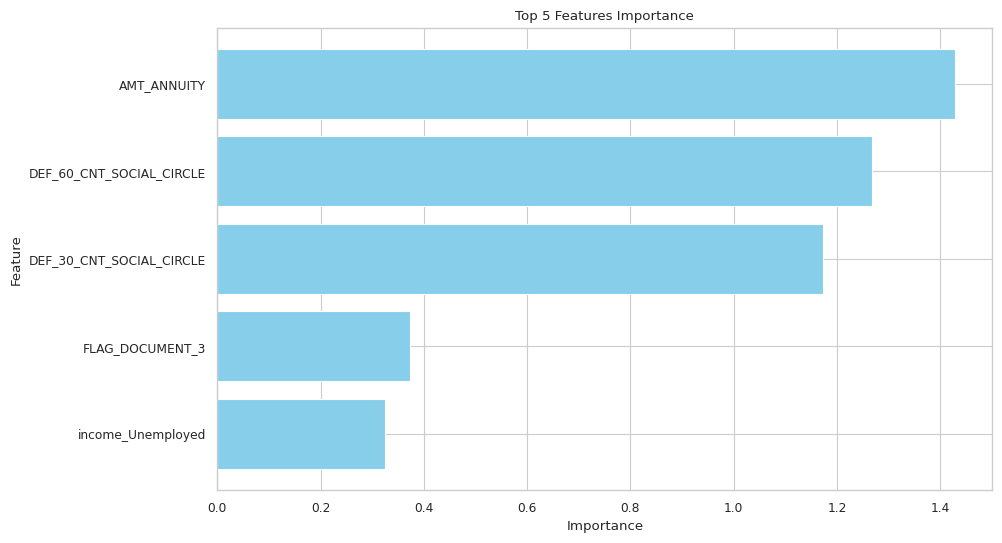

In [95]:
top5_importance_df = importance_df.head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top5_importance_df['Feature'], top5_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Features Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()

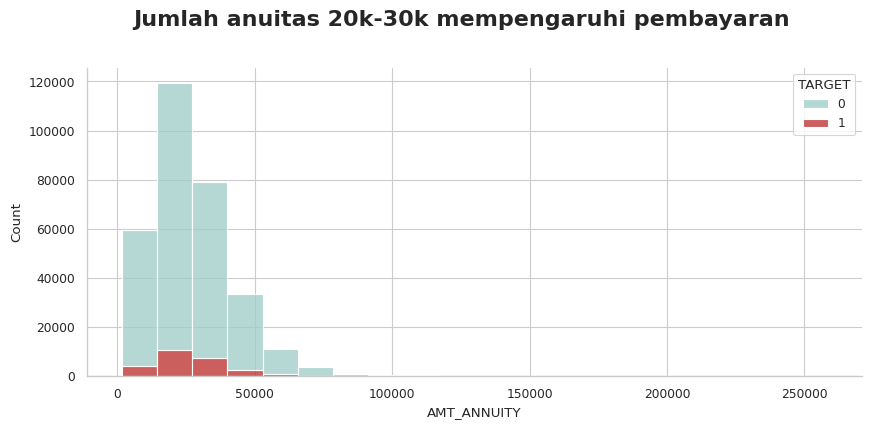

In [102]:
fig, ax = plt.subplots(figsize=(10, 4))

sns.histplot(df_fe, x='AMT_ANNUITY', bins=20, hue='TARGET', palette=['#9eccc8', '#b92a27'], multiple='stack', ax=ax)
max_churn_value = df_fe['TARGET'].max()

plt.figtext(0.5, 1.0,
           "Jumlah anuitas 20k-30k mempengaruhi pembayaran",
           ha='center', va='center', fontsize=16, weight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()